~ Kelompok Mini Project Penggalian Data ~

202010370311138 Asfa Maghfiratunnisa

202010370311132 Muhammad Najwa Ma'ruf

202010370311142 Anisa Kusumawati

##Import

In [ ]:
# Memanggil semua library agar variabel bisa terpanggil dan program berjaan dengan lancar

# Default
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.offline as py
import plotly
import plotly.graph_objects as go
import seaborn as sns

# Data prepocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Tuning parameter
from sklearn.model_selection import GridSearchCV

# Model
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from keras.optimizers import SGD
from keras.optimizers import Adam
from sklearn.neural_network import MLPClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# result
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score


#retina
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

<ipython-input-1-28eada73926f>:58: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`



In [ ]:
# Pemanggilan dataset yang akan digunakan
# Mengubah nama atribut "NObeyesdad" menjadi "result"

df = pd.read_csv('/content/sample_data/ObesityDataSet_raw_and_data_sinthetic.csv')
# rename the lebel columns from 'NObeyesdad' to 'result'
df = df.rename(columns={'NObeyesdad': 'result'})
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,result
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


##EDA (Exploratory Data Analysis)

In [ ]:
# Cek apakah terdapat nilai yang kosong dan mengetahui tipe data dari semua atribut

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [ ]:
# Cek apakah terdapat nilai yg kosong

df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
result                            0
dtype: int64

In [ ]:
# Menjelaskan nilai quartil, median, dan mean yang ada pada dataset

df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
# Mengelompokan atribut mana saja yang memiliki tipe data numeri

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


object_cols = [col for col in df.columns if df[col].dtype == "object"]

good_label_cols = [col for col in object_cols if set(df[col]).issubset(set(df[col]))]
good_label_cols.remove('result')

print('Categorical columns that will be ordinal encoded:', good_label_cols)

Categorical columns that will be ordinal encoded: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


In [ ]:
printf = 'Value Unique {}:\n {} \n'

for count, i in enumerate(object_cols):
    val_count = df['{}'.format(i)].value_counts()
    print(count, printf.format(i, val_count))

0 Value Unique Gender:
 Male      1068
Female    1043
Name: Gender, dtype: int64 

1 Value Unique family_history_with_overweight:
 yes    1726
no      385
Name: family_history_with_overweight, dtype: int64 

2 Value Unique FAVC:
 yes    1866
no      245
Name: FAVC, dtype: int64 

3 Value Unique CAEC:
 Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64 

4 Value Unique SMOKE:
 no     2067
yes      44
Name: SMOKE, dtype: int64 

5 Value Unique SCC:
 no     2015
yes      96
Name: SCC, dtype: int64 

6 Value Unique CALC:
 Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64 

7 Value Unique MTRANS:
 Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64 

8 Value Unique result:
 Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Leve

In [ ]:
df.result.value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: result, dtype: int64

Transformation

In [ ]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,result
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
df_transform = df.copy()

In [ ]:
df_transform

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,result
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
df_transform.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


#Preprocessing Report

- Data dengan tipe object berjumlah 8 attribute yaitu 'Gender', 'FHWO', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'result'

- Data features dengan tipe object berjumlah 7 attribute yaitu semua data objeck selain 'result'

- Data target/label dengan tipe object yaitu 'result'

- Semua data features dengan tipe object ditransform encoding dengan menggunakan class OrdinalEncoder yang terdapat di library sklearn.preprocessing

- Data target juga di transform encoding namujn dengan cara manual yaitu mengubah variabel yang terdapat di kolom target atau BMI menjadi bentuk numerik.

- Transformation encoding dilakukan agar dapat diproses oleh algoritma machine learning.


##Data Visualization

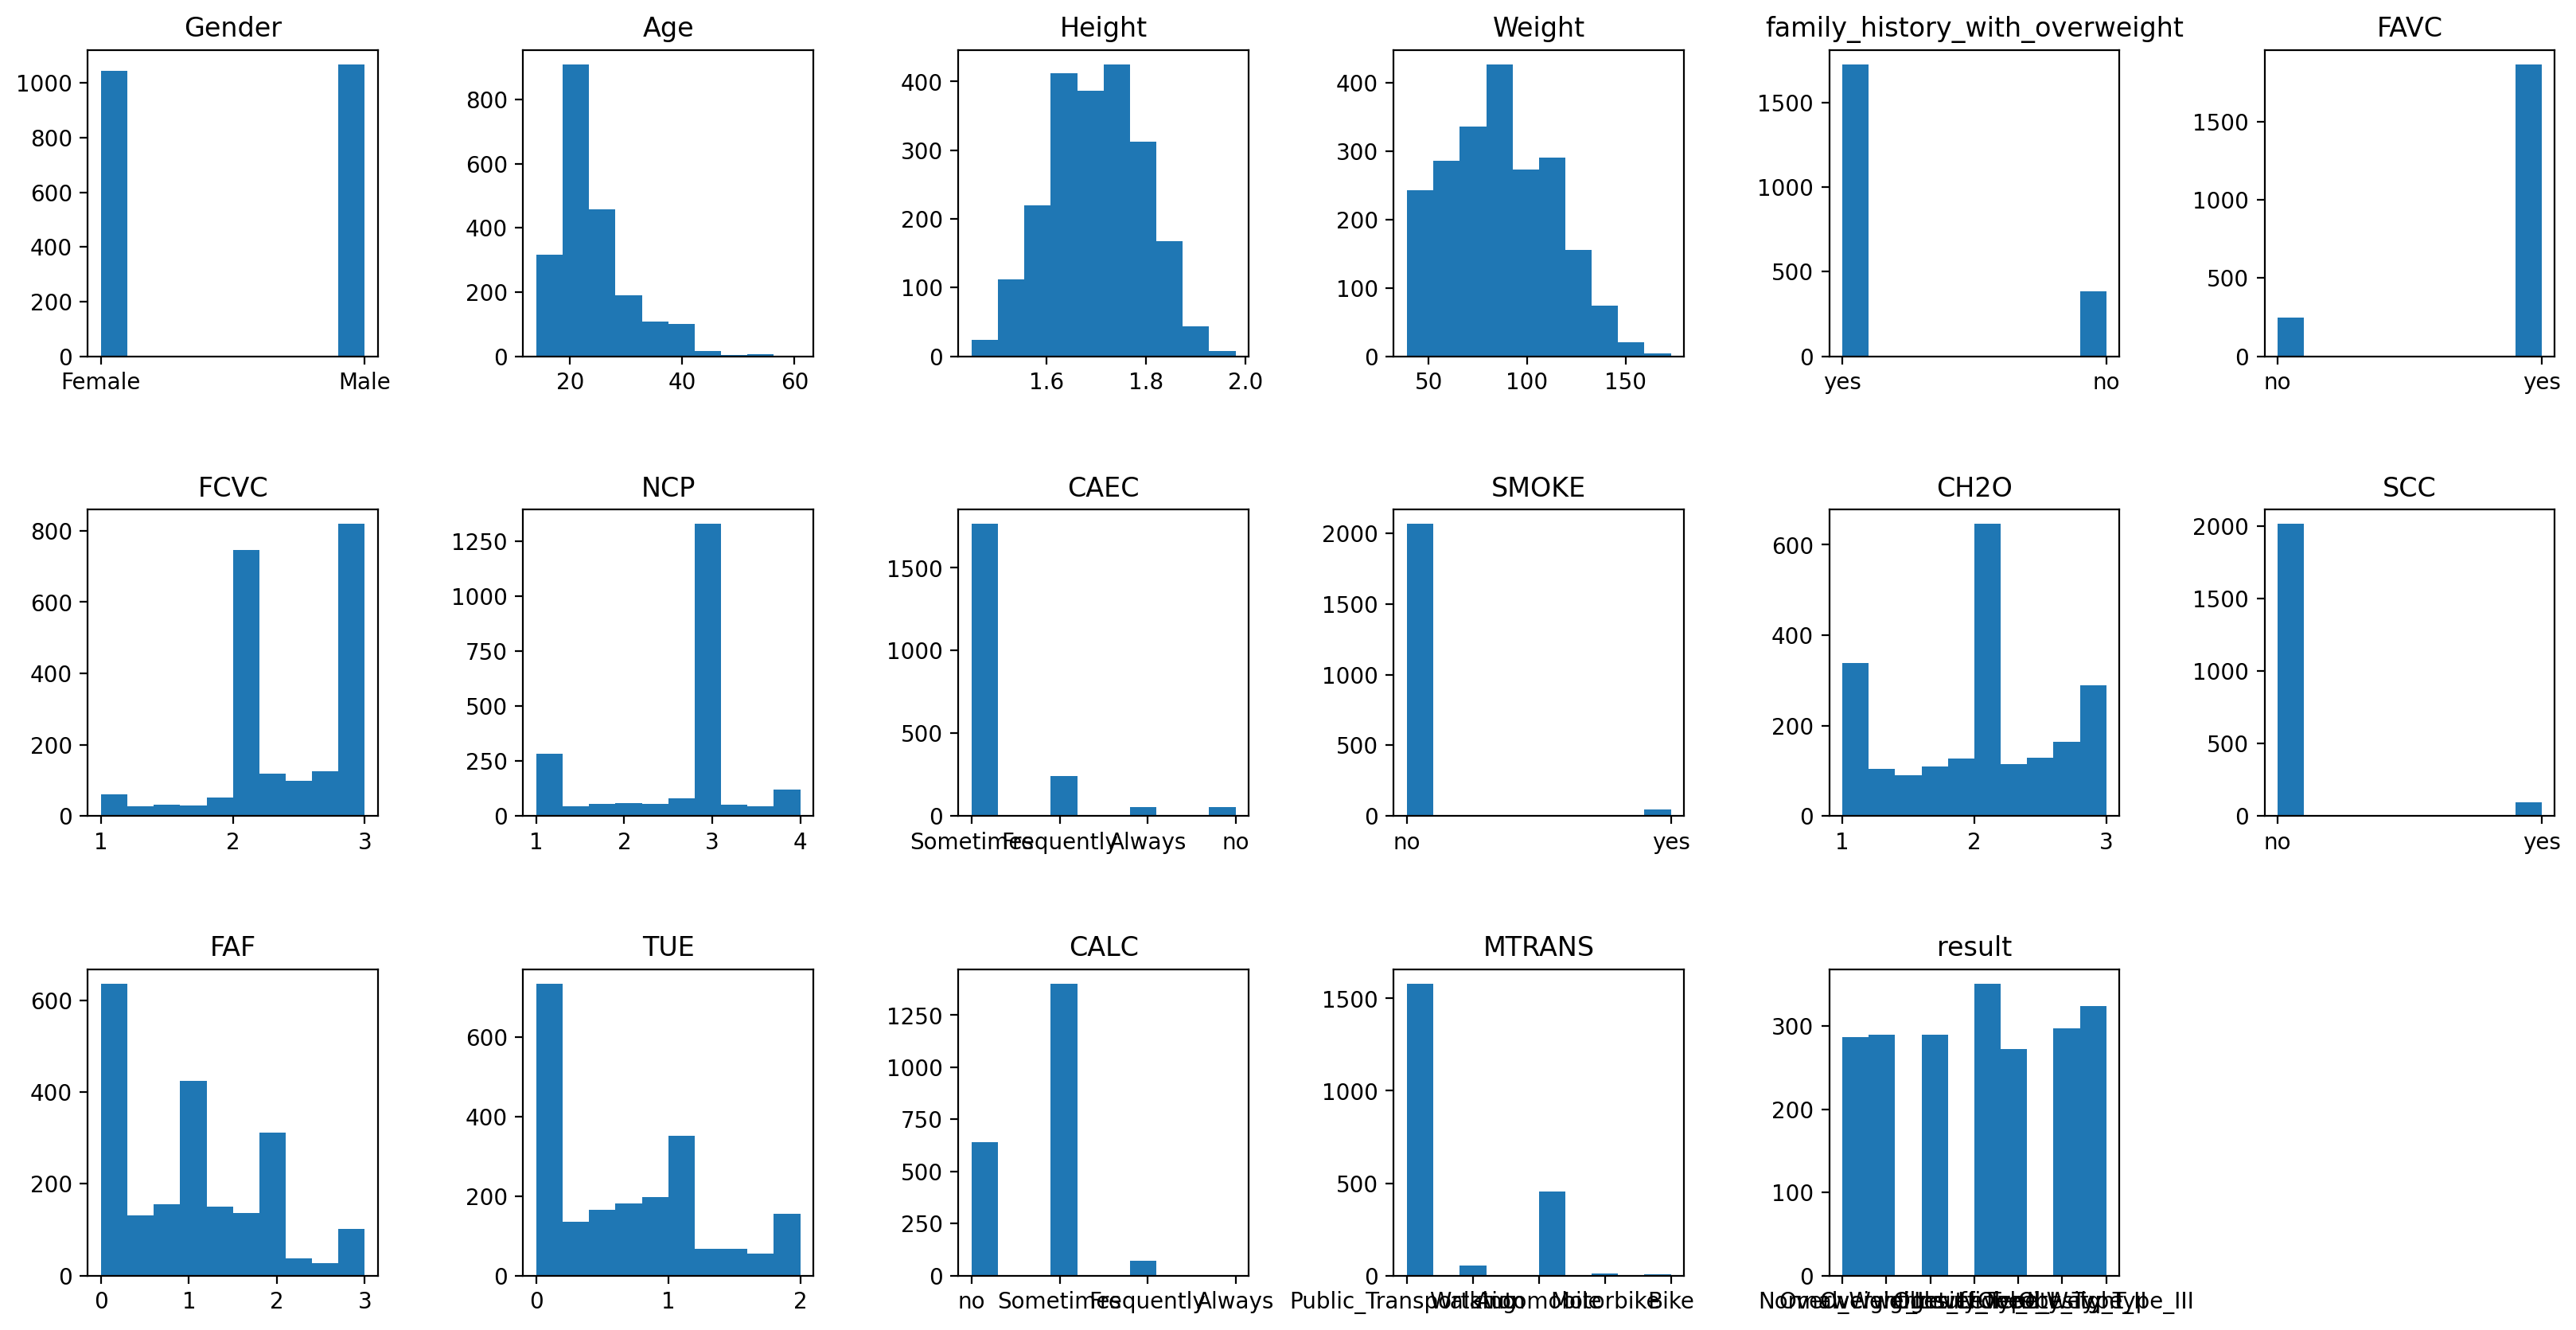

In [ ]:
import math
import matplotlib.pyplot as plt

# Menghitung jumlah baris dan kolom yang dibutuhkan
n_cols = len(df_transform.columns)
n_rows = math.ceil(n_cols/6)

# Mengatur ukuran figure
fig, axes = plt.subplots(nrows=n_rows, ncols=6, figsize=(20, 10))

# Mengatur jarak antar subplot
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Menampilkan histogram pada setiap kolom
for i, ax in enumerate(axes.flatten()):
    if i < n_cols:
        ax.hist(df_transform.iloc[:, i], bins=10)
        ax.set_title(df_transform.columns[i])
    else:
        fig.delaxes(ax) # Menghapus subplot yang tersisa

# Menampilkan grafik
plt.show()

In [ ]:
name = df['result'].value_counts().index
num = df['result'].value_counts().values

fig = px.pie(data_frame=df,names=name,values=num
             ,title='Pies chard show the over all result',width=800,height=600)
fig.update_traces(textposition='inside',textinfo='label+percent')
fig.show()

Preparing Data Train and Test

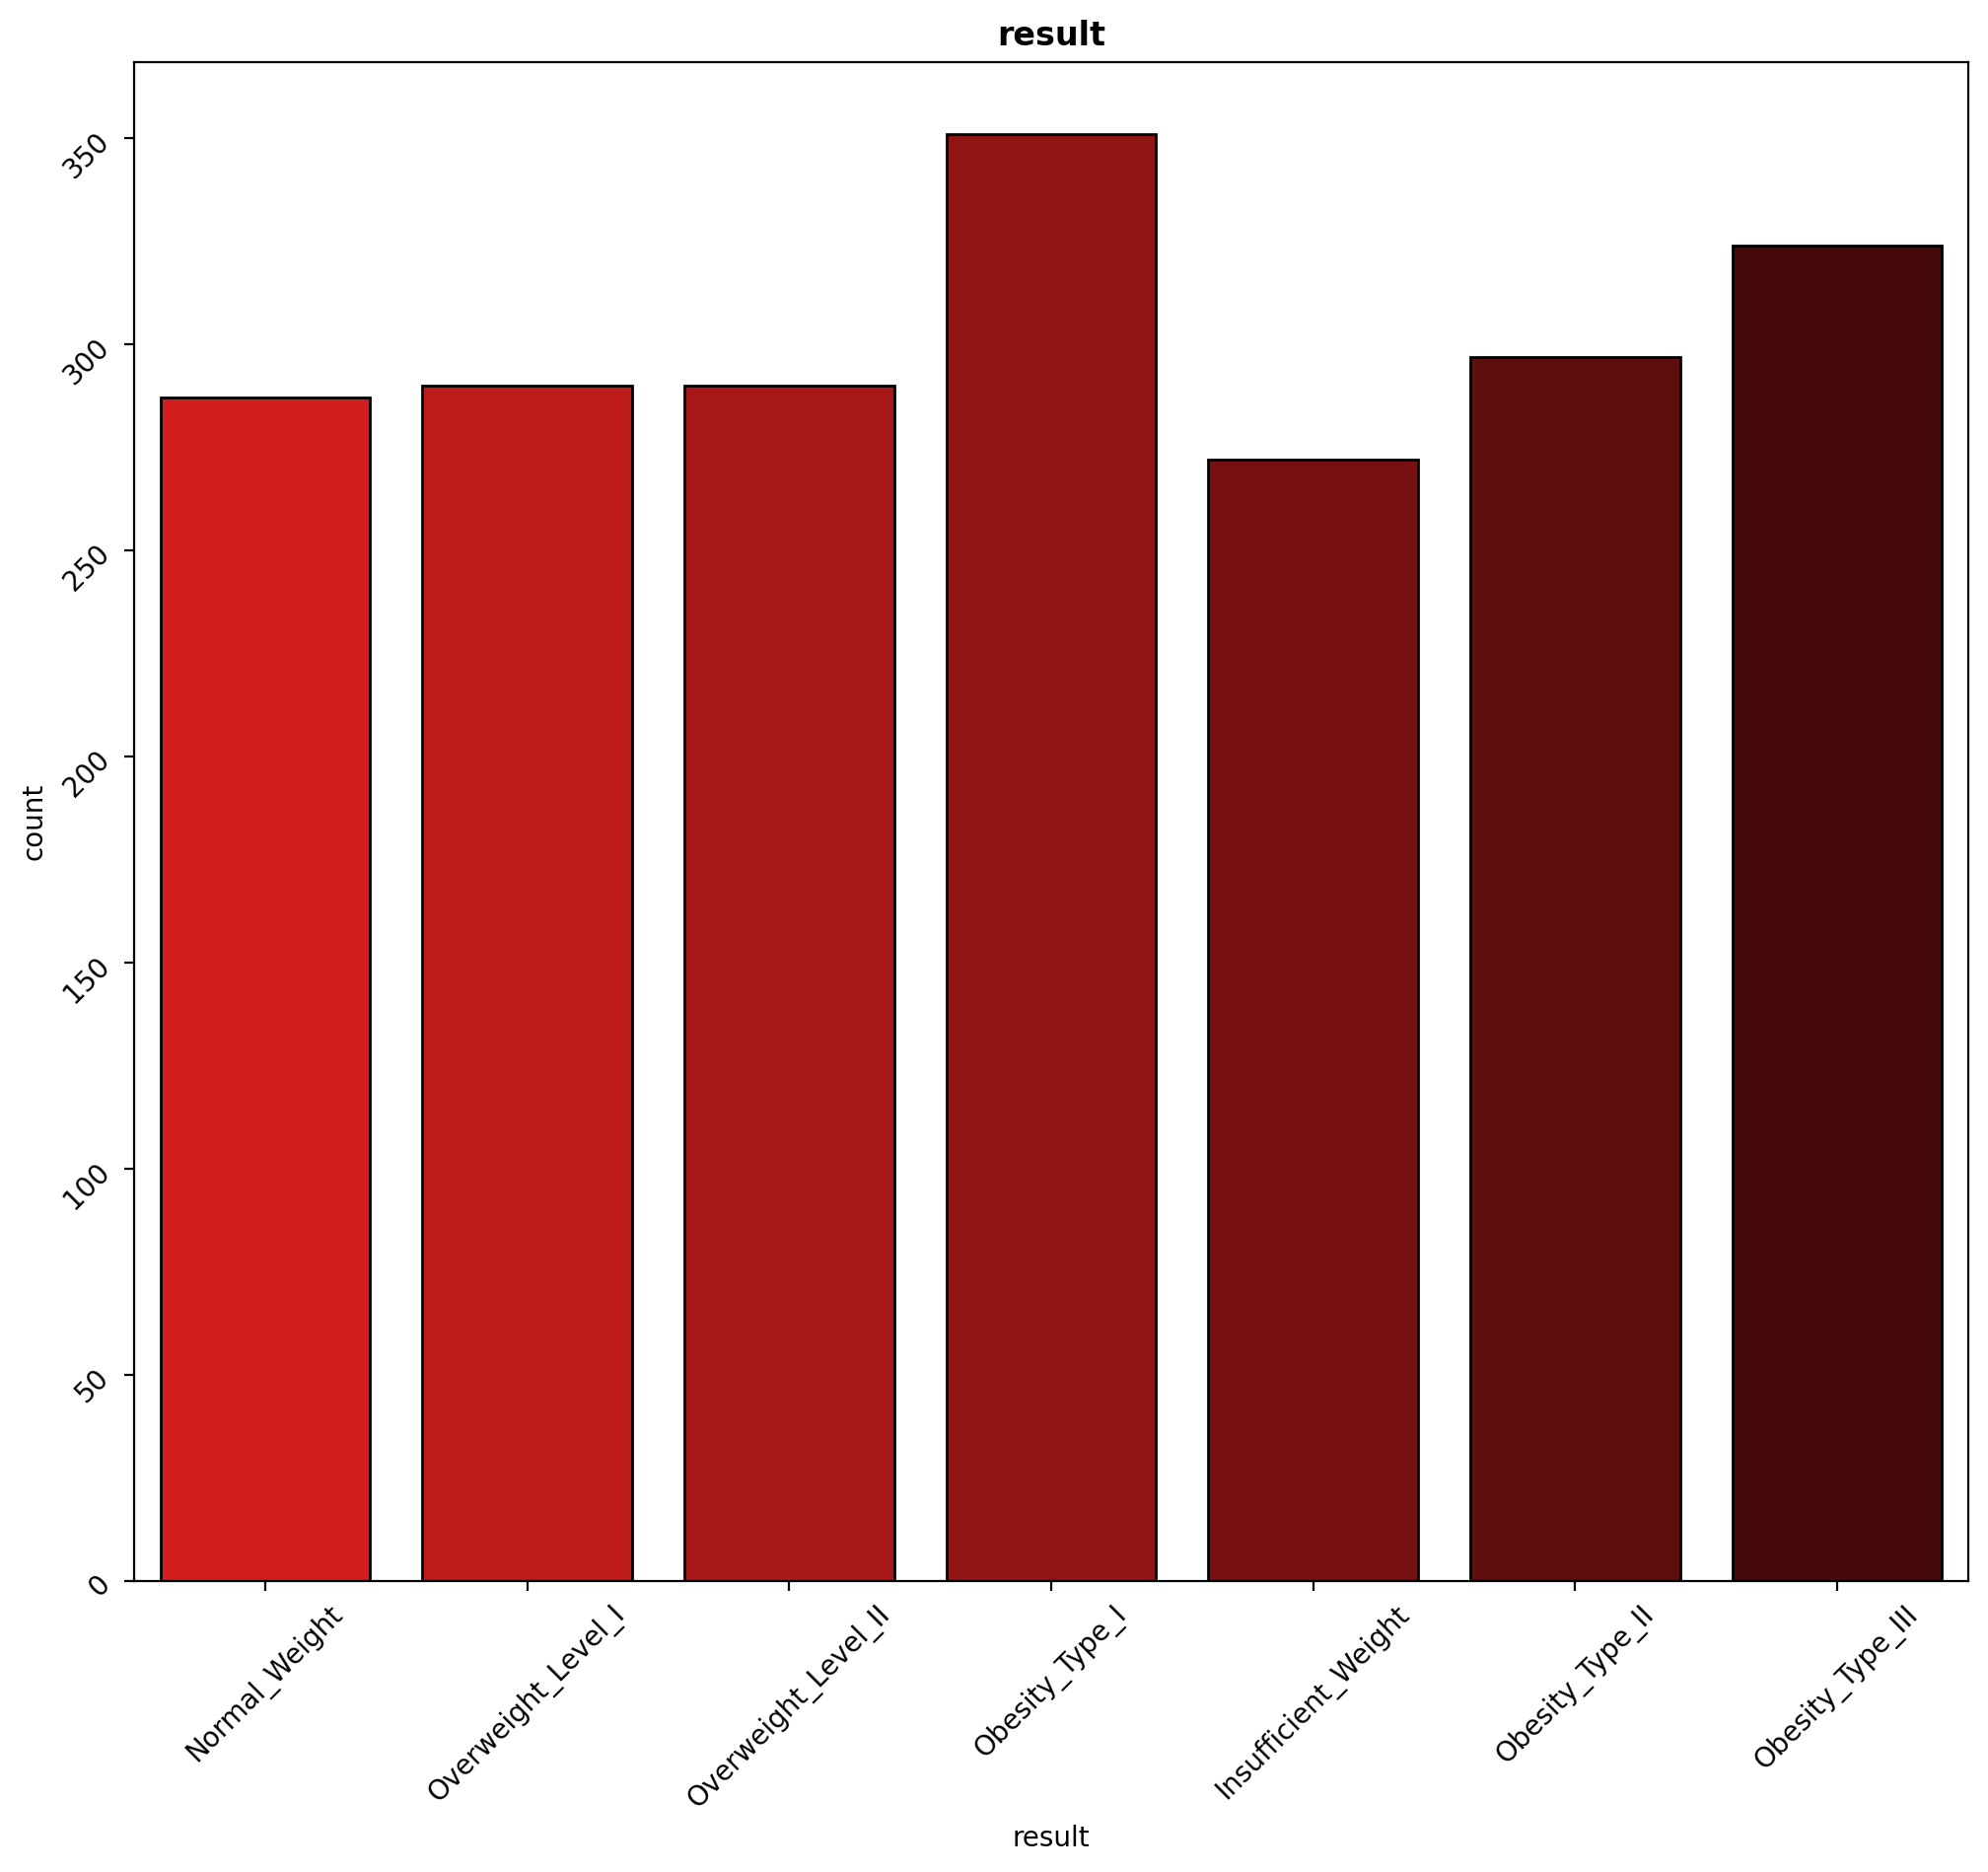

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(x="result",data=df,palette="flag",edgecolor="black")
plt.title('result', weight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
# changing the font size
sns.set(font_scale=1)
plt.savefig('unbalanced_data.png', bbox_inches='tight', pad_inches=0.0)

In [ ]:
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()

df['Gender_cat'] = lbl.fit_transform(df['Gender'].astype(str))
df['FHWO_cat'] = lbl.fit_transform(df['family_history_with_overweight'].astype(str))
df['FAVC_cat'] = lbl.fit_transform(df['FAVC'].astype(str))
df['CAEC_cat'] = lbl.fit_transform(df['CAEC'].astype(str))
df['SMOKE_cat'] = lbl.fit_transform(df['SMOKE'].astype(str))
df['SCC_cat'] = lbl.fit_transform(df['SCC'].astype(str))
df['CALC_cat'] = lbl.fit_transform(df['CALC'].astype(str))
df['MTRANS_cat'] = lbl.fit_transform(df['MTRANS'].astype(str))
df['result_cat'] = lbl.fit_transform(df['result'].astype(str))

In [ ]:
X = df[['Gender_cat','Age','Height','Weight','FHWO_cat', 'FAVC_cat', 'FCVC', 'NCP', 'CAEC_cat','SMOKE_cat', 'CH2O', 'SCC_cat', 'FAF','TUE', 'CALC_cat','MTRANS_cat' ]]
y = df['result_cat']
data_complete = df[['Gender_cat','Age','Height','Weight','FHWO_cat', 'FAVC_cat', 'FCVC', 'NCP', 'CAEC_cat','SMOKE_cat', 'CH2O', 'SCC_cat', 'FAF','TUE', 'CALC_cat','MTRANS_cat', 'result_cat' ]]

In [ ]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,result,Gender_cat,FHWO_cat,FAVC_cat,CAEC_cat,SMOKE_cat,SCC_cat,CALC_cat,MTRANS_cat,result_cat
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,...,Normal_Weight,0,1,0,2,0,0,3,3,1
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,...,Normal_Weight,0,1,0,2,1,1,2,3,1
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,...,Normal_Weight,1,1,0,2,0,0,1,3,1
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,...,Overweight_Level_I,1,0,0,2,0,0,1,4,5
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,...,Overweight_Level_II,1,0,0,2,0,0,2,3,6


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=1, n=351 (14.286%)
Class=5, n=351 (14.286%)
Class=6, n=351 (14.286%)
Class=2, n=351 (14.286%)
Class=0, n=351 (14.286%)
Class=3, n=351 (14.286%)
Class=4, n=351 (14.286%)


['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']

[1 5 6 2 0 3 4]

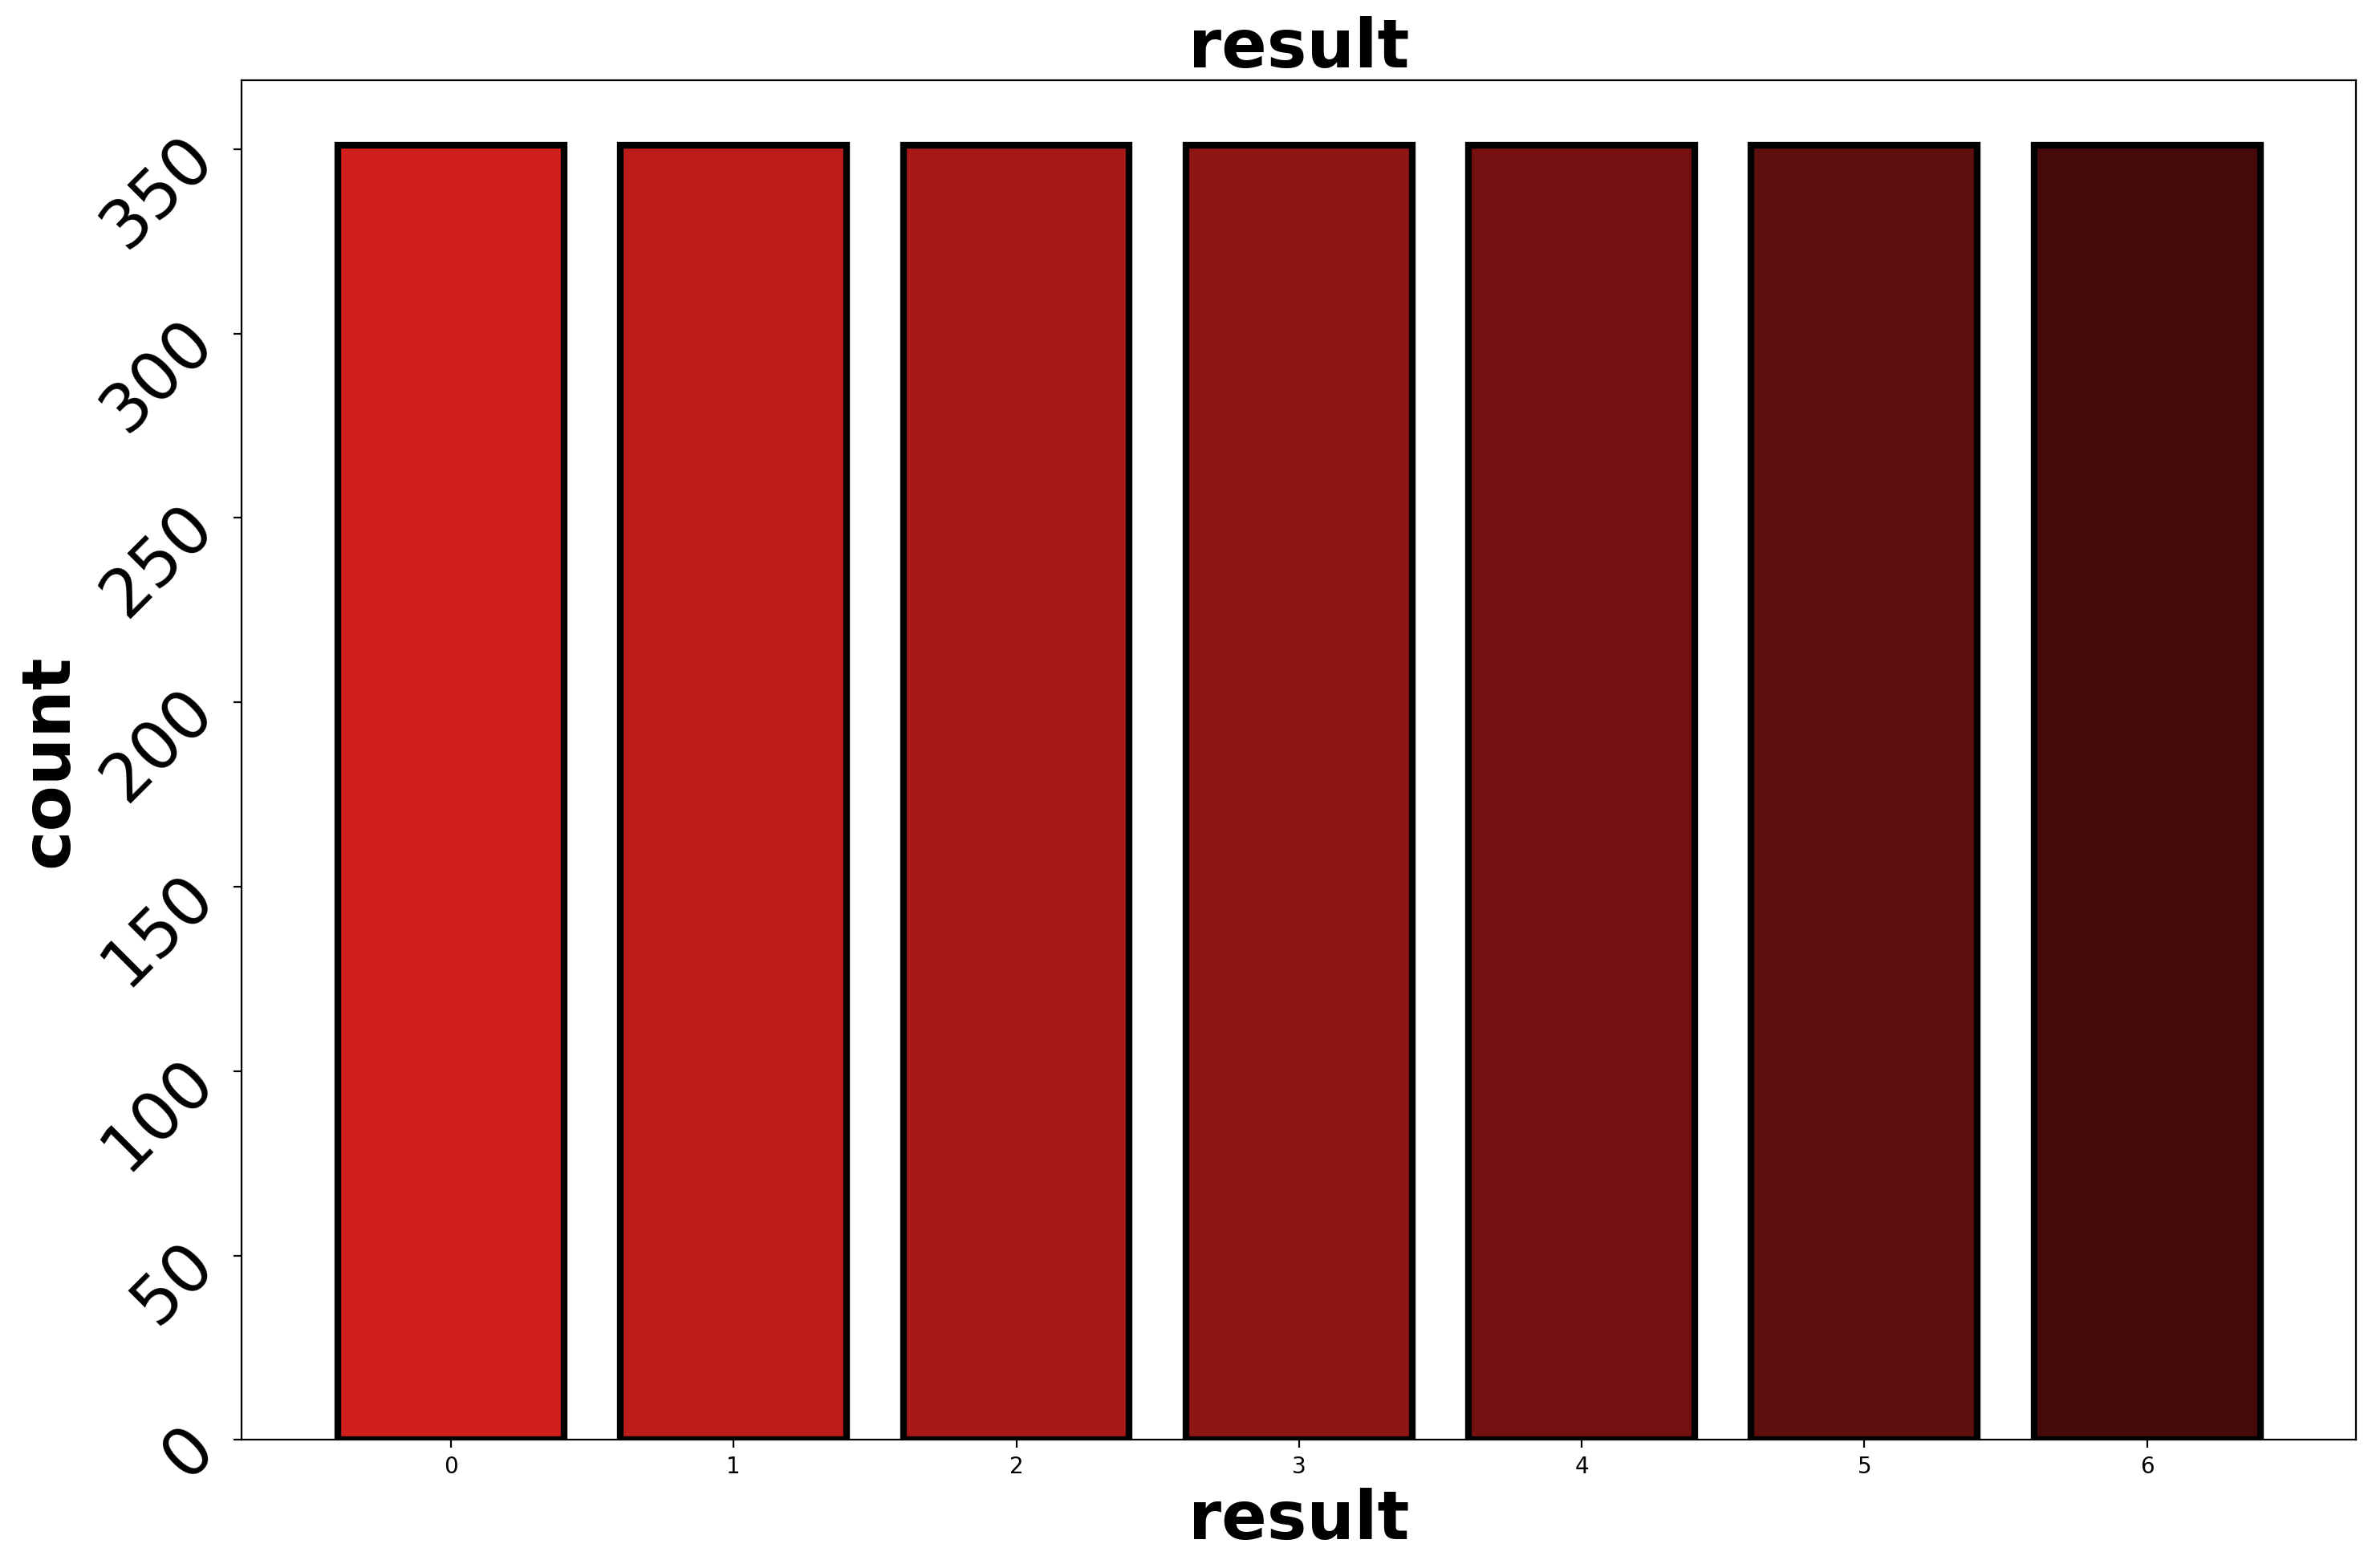

In [ ]:
c = ['#be1b1b', '#5f0e0e', '#460a0a', '#a81818', '#d31e1e', '#901515', '#771111']
# plot the distribution
plt.figure(figsize=(17,11))
plt.style.use('default') #dark_background
plt.title('result', weight='bold', fontsize='30')
#plt.xticks(rotation=45)
#plt.rc('xtick',labelsize=18)
plt.xlabel('result', weight='bold', fontsize='30')
plt.ylabel("count", weight='bold', fontsize='30')
plt.bar(counter.keys(), counter.values(), fill = True, edgecolor = 'black', linewidth=3.0, color=c)

plt.yticks(rotation=45, fontsize='30')
plt.savefig('balanced_data.png', bbox_inches='tight', pad_inches=0.0, transparent=True)
plt.show()

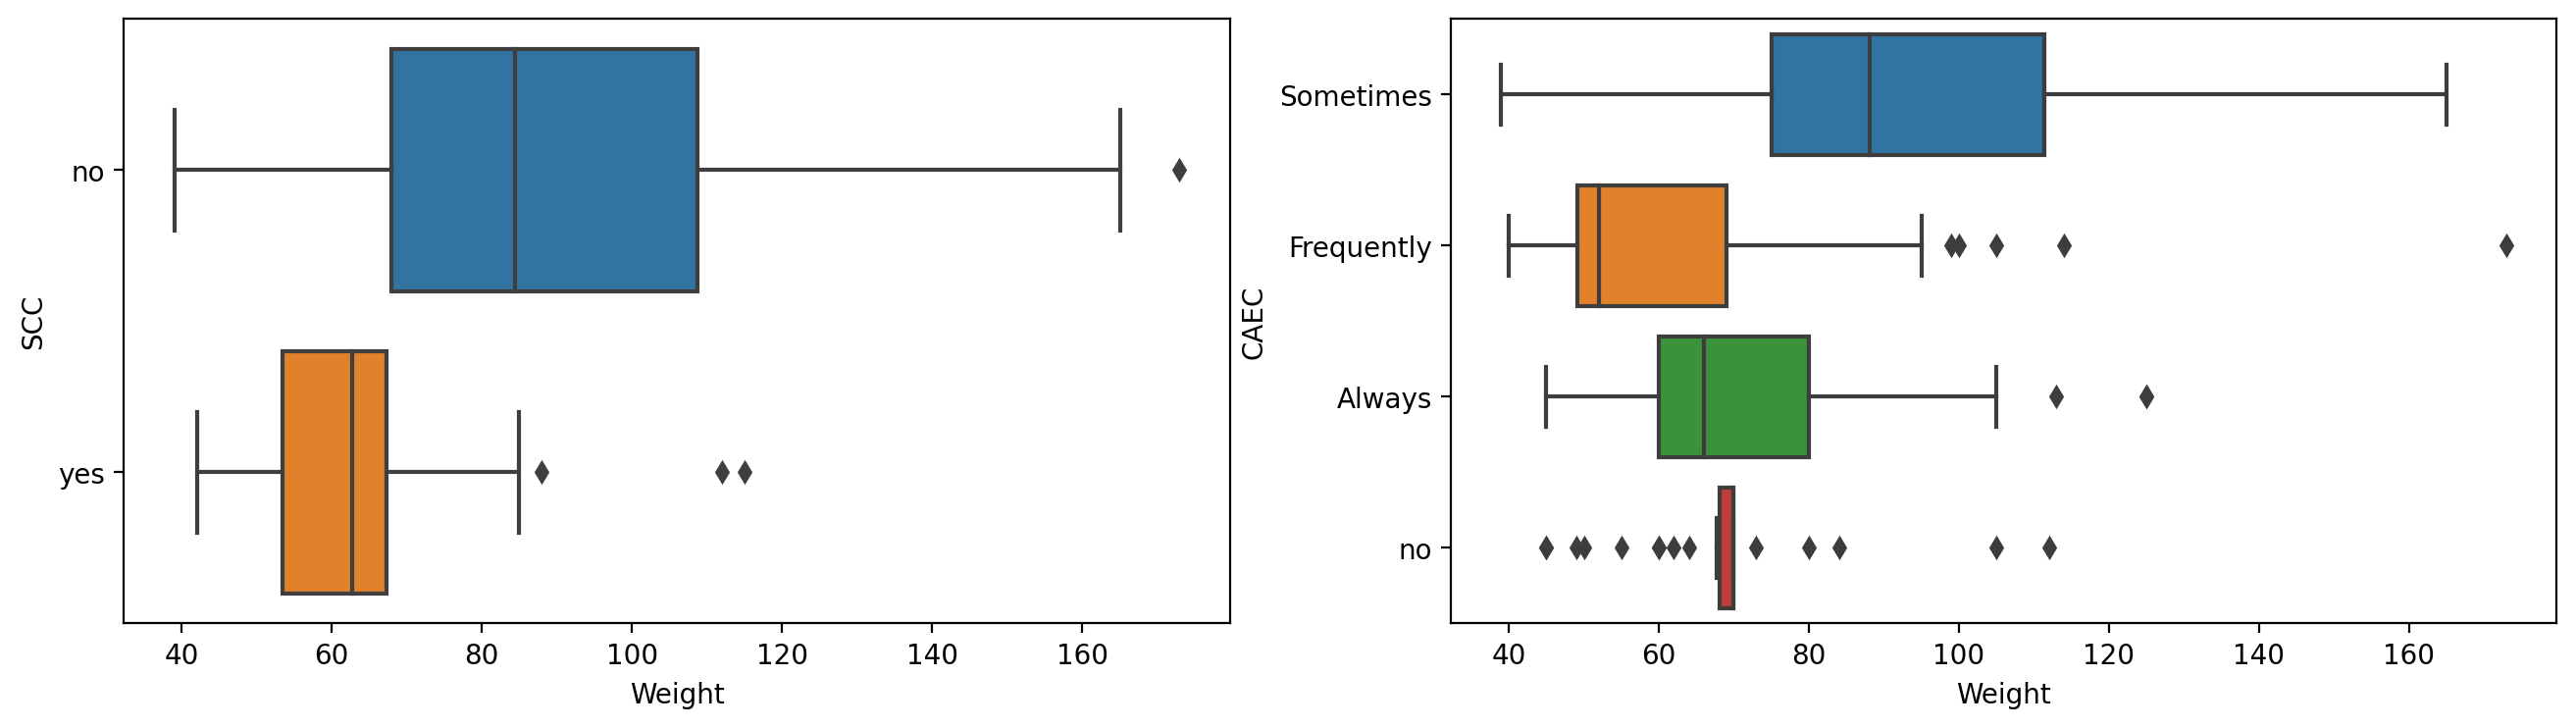

In [ ]:
plt.figure(figsize=(16, 4))
plt.subplot(121)
sns.boxplot(x = 'Weight', y = 'SCC', data = df)
plt.subplot(122)
sns.boxplot(x = 'Weight', y = 'CAEC', data = df)
plt.show()

<ipython-input-22-c8fc710d6d34>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-22-c8fc710d6d34>:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-22-c8fc710d6d34>:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use e

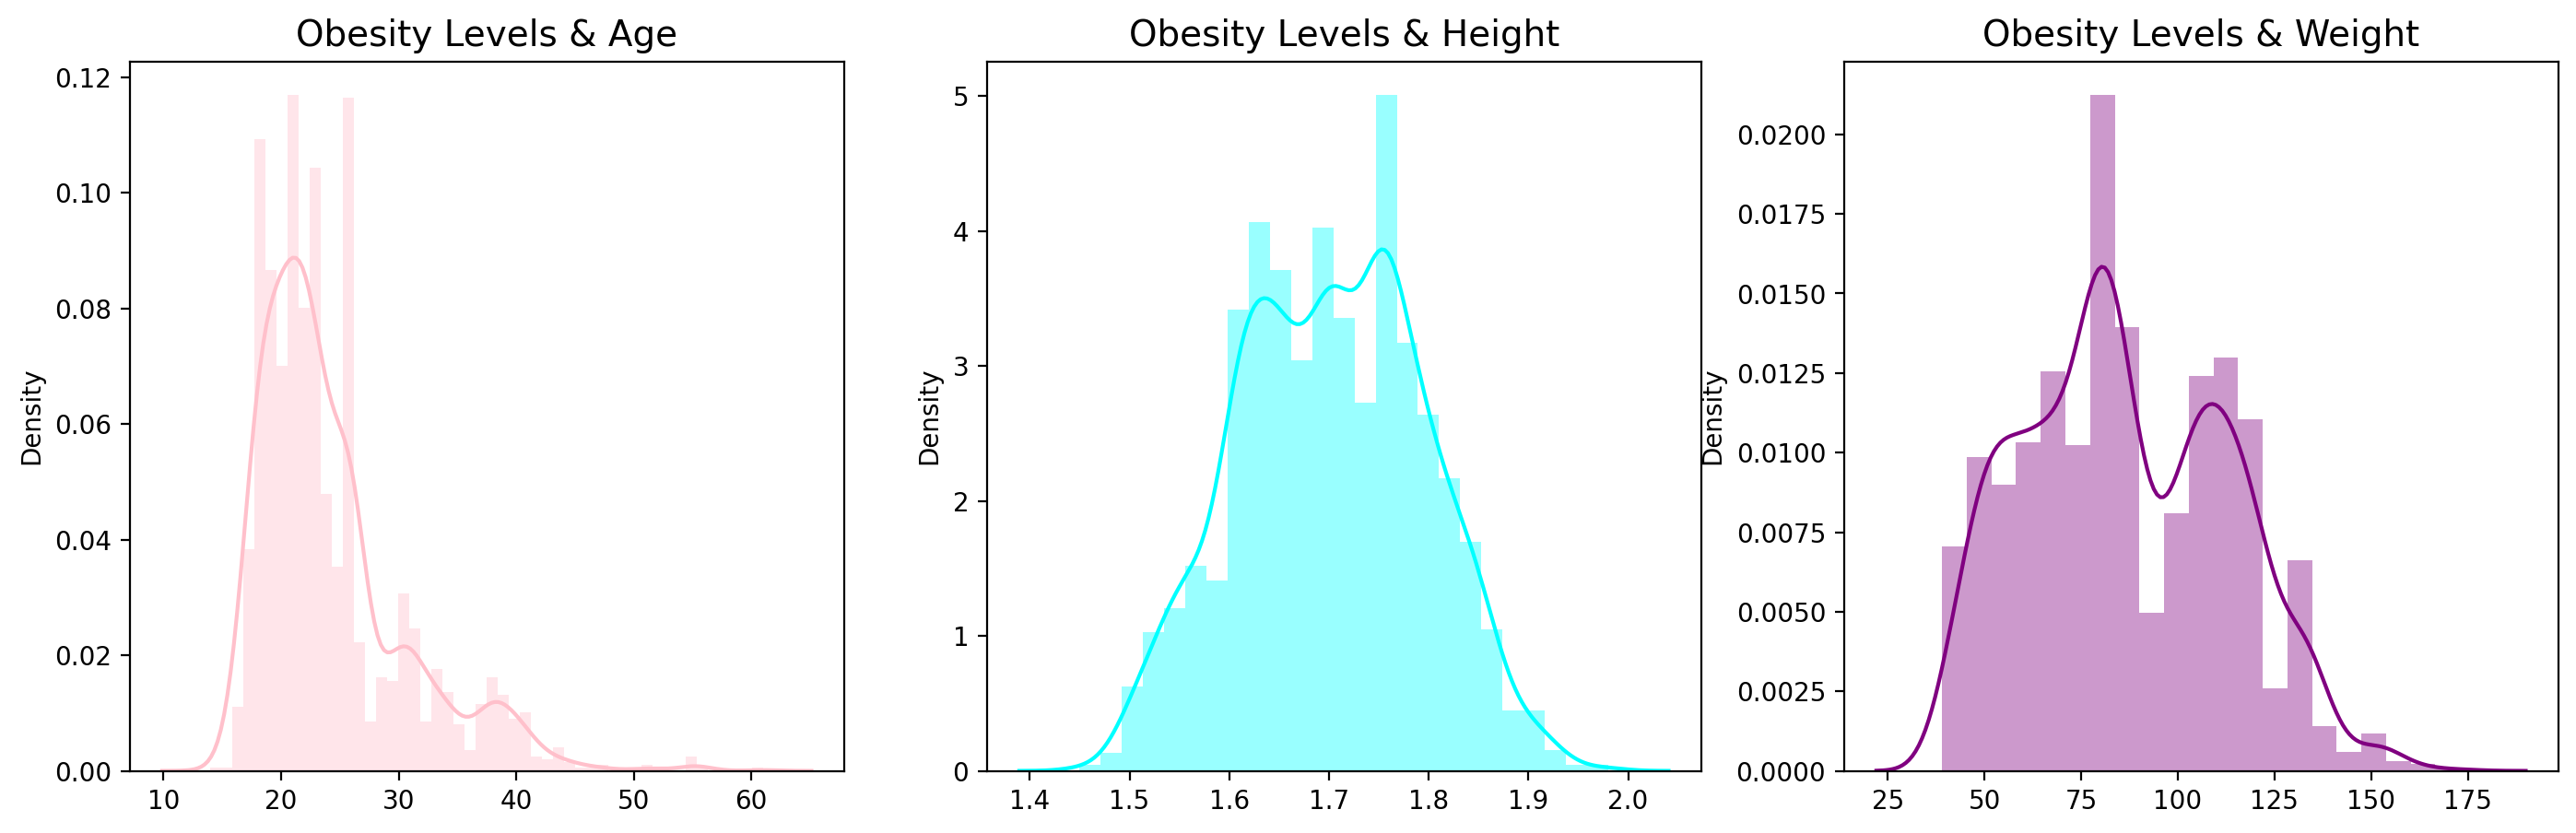

In [ ]:
# Distribution of different type of amount
fig , ax = plt.subplots(1,3,figsize = (17,5))

Age = df.Age.values
Height= df.Height.values
Weight = df.Weight.values

sns.distplot(Age , ax = ax[0] , color = 'pink').set_title('Obesity Levels & Age' , fontsize = 14)
sns.distplot(Height , ax = ax[1] , color = 'cyan').set_title('Obesity Levels & Height' , fontsize = 14)
sns.distplot(Weight , ax = ax[2] , color = 'purple').set_title('Obesity Levels & Weight' , fontsize = 14)


plt.show()

In [ ]:
# Pivoting data Gender dengan result
pd.crosstab(df['Gender'], df['result'], margins = True, margins_name = "Total")

result,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II,Total
Gender,,,,,,,,
Female,173,141,156,2,323,145,103,1043
Male,99,146,195,295,1,145,187,1068
Total,272,287,351,297,324,290,290,2111


Korelasi data

In [ ]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('/content/sample_data/ObesityDataSet_cleaned_and_data_sinthetic.csv', index_col=0)

# rename the lebel columns from 'NObeyesdad' to 'result'
data = df.rename(columns={'NObeyesdad': 'result'})
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,result,BMI
id,,,,,,,,,,,,,,,,,,
1,female,21,1.62,64,yes,no,sometimes,3,sometimes,no,between 1 and 2 l,no,0,3 to 5,no,public_transportation,normal_weight,24.386526
2,female,21,1.52,56,yes,no,always,3,sometimes,yes,more than 2 l,yes,4 to 5,0 to 2,sometimes,public_transportation,normal_weight,24.238227
3,male,23,1.80,77,yes,no,sometimes,3,sometimes,no,between 1 and 2 l,no,2 to 4,3 to 5,frequently,public_transportation,normal_weight,23.765432
4,male,27,1.80,87,no,no,always,3,sometimes,no,between 1 and 2 l,no,2 to 4,0 to 2,frequently,walking,overweight_level_i,26.851852
5,male,22,1.78,90,no,no,sometimes,1,sometimes,no,between 1 and 2 l,no,0,0 to 2,sometimes,public_transportation,overweight_level_ii,28.342381


In [ ]:
df.shape #for checking rows and cols count

(2111, 18)

In [ ]:
df.dtypes #for checking what type of data is present

Gender                             object
Age                                 int64
Height                            float64
Weight                              int64
family_history_with_overweight     object
FAVC                               object
FCVC                               object
NCP                                 int64
CAEC                               object
SMOKE                              object
CH2O                               object
SCC                                object
FAF                                object
TUE                                object
CALC                               object
MTRANS                             object
NObeyesdad                         object
BMI                               float64
dtype: object

In [ ]:
df.nunique() #to check unique values in cols

Gender                               2
Age                                 40
Height                            1574
Weight                             118
family_history_with_overweight       2
FAVC                                 2
FCVC                                 3
NCP                                  4
CAEC                                 4
SMOKE                                2
CH2O                                 3
SCC                                  2
FAF                                  4
TUE                                  3
CALC                                 4
MTRANS                               5
NObeyesdad                           7
BMI                               1968
dtype: int64

In [ ]:
df.isnull().sum() #to check values if present

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
BMI                               0
dtype: int64

In [ ]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'BMI'],
      dtype='object')

In [ ]:
df.describe()

,Age,Height,Weight,NCP,BMI
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701677,86.588820,2.687826,29.700159
std,6.357078,0.093305,26.188572,0.809680,8.011337
min,14.000000,1.450000,39.000000,1.000000,12.998685
25%,20.000000,1.630000,65.500000,3.000000,24.325802
50%,23.000000,1.700499,83.000000,3.000000,28.719089
75%,26.000000,1.768464,107.000000,3.000000,36.016501
max,61.000000,1.980000,173.000000,4.000000,50.811753


menentukan hubungan semua atribut dengan BMI berdasarkan jenis kelamin,
Pertama kita dapat melihat sekilas semua jenis obesitas dan jumlahnya.

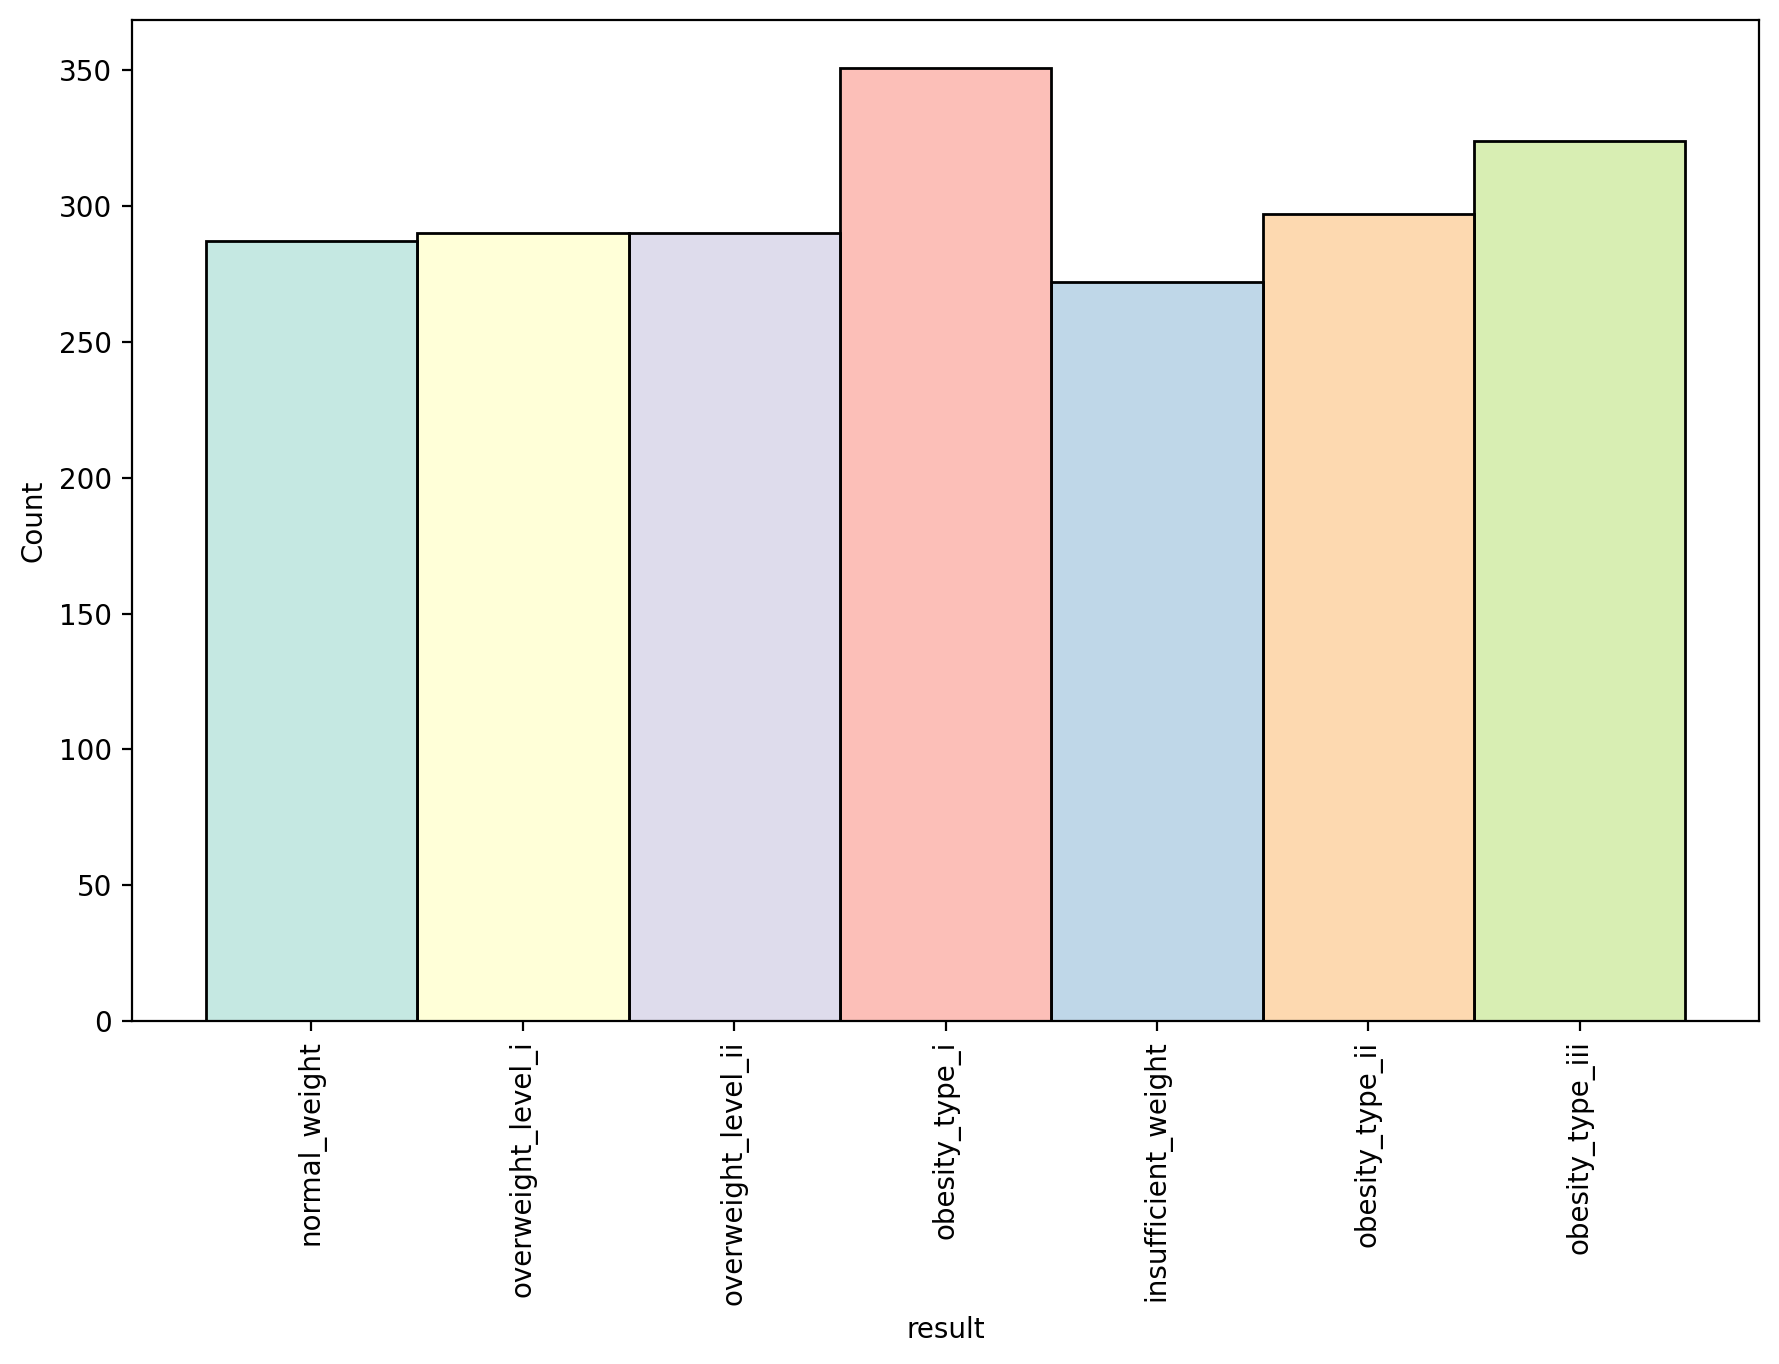

In [ ]:
sns.histplot(data=data, x = "result",hue="result",palette="Set3", legend= False)
plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches(10.5, 6.5)

Obesitas Tipe I memiliki jumlah tertinggi, diikuti oleh Obesitas Tipe III, sedangkan Berat Badan Kurang memiliki jumlah yang lebih rendah.

Untuk mencari analisis yang lebih akurat, kami memecah histogram lebih lanjut menggunakan nilai BMI, bukan result.

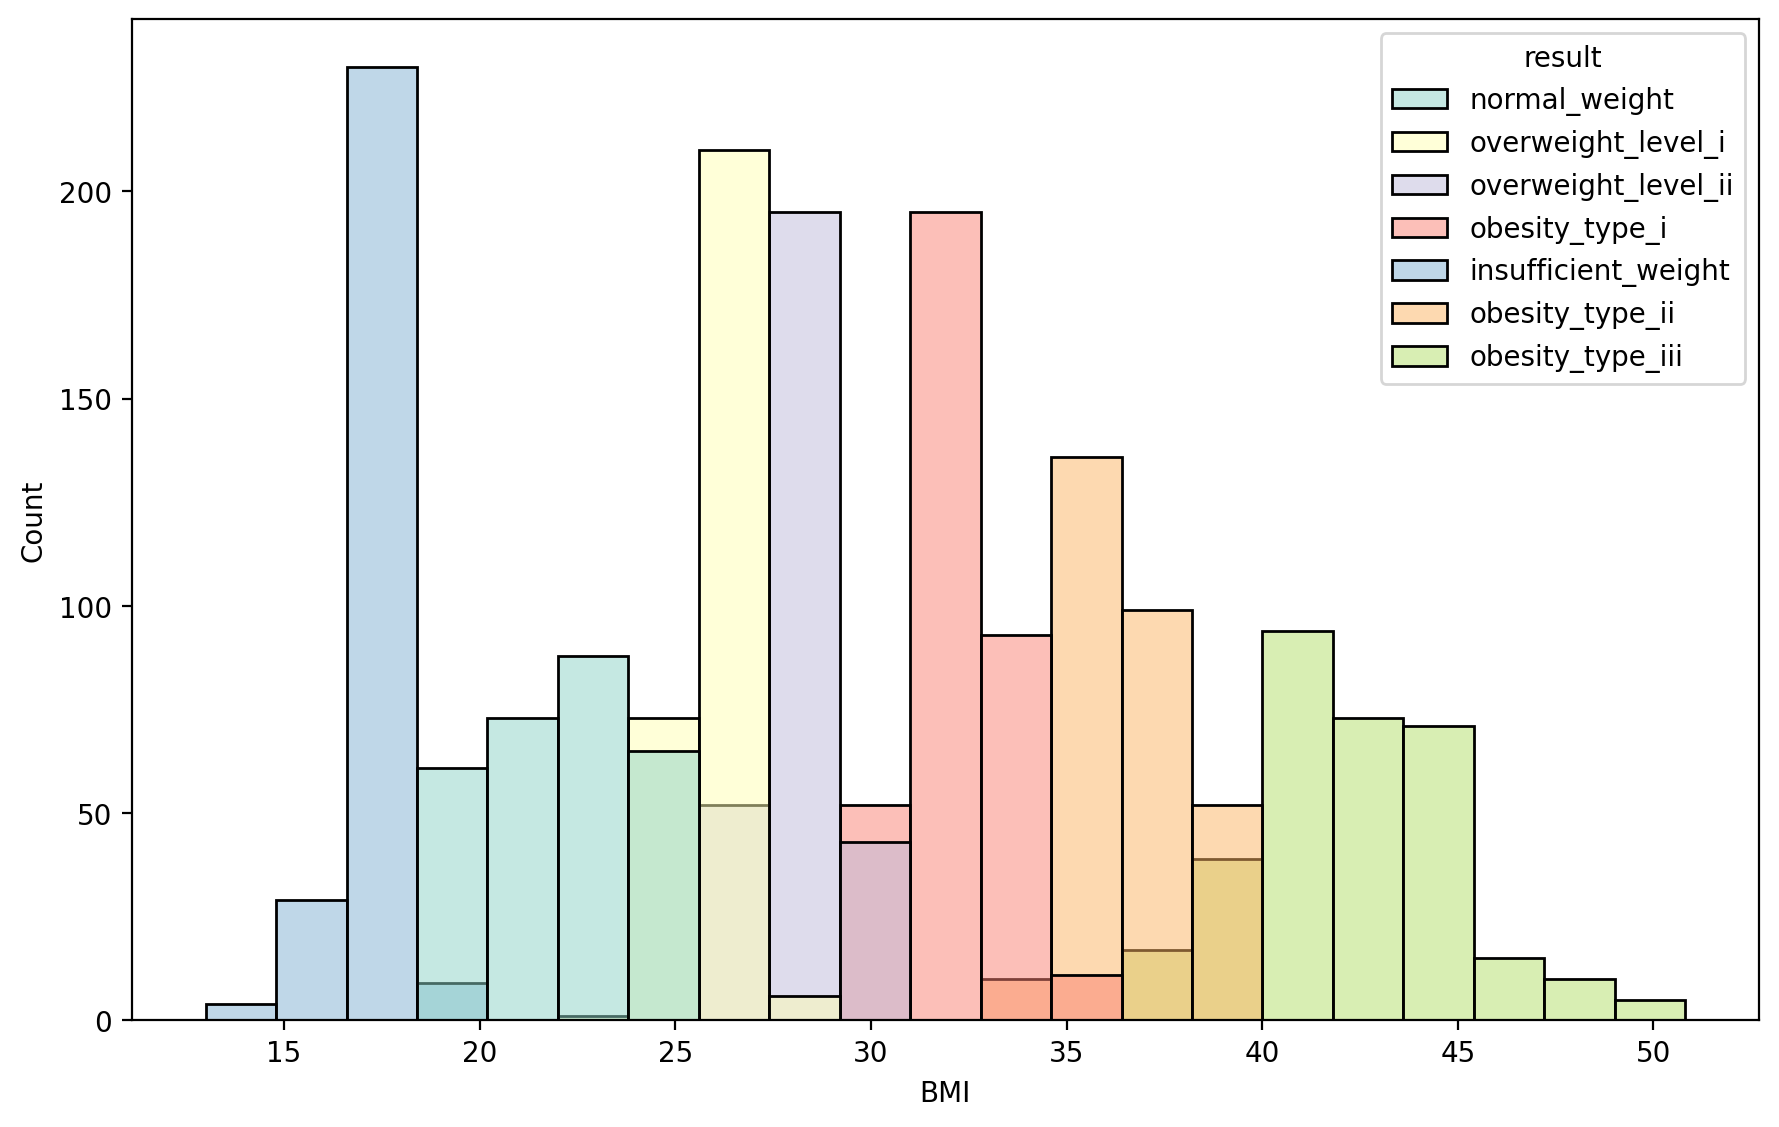

In [ ]:
sns.histplot(data=data, x="BMI",hue="result",palette="Set3")
fig = plt.gcf()
fig.set_size_inches(10.5, 6.5)

dapat melihat bahwa distribusinya luas, cukup acak, dan sedikit berekor di kedua sisi. Berat badan tidak mencukupi sekitar 18 BMI memiliki hitungan angka tertinggi diikuti dengan kelebihan berat badan sekitar 25 BMI hingga 28 BMI, dan obesitas tipe 1 sekitar 32 BMI.


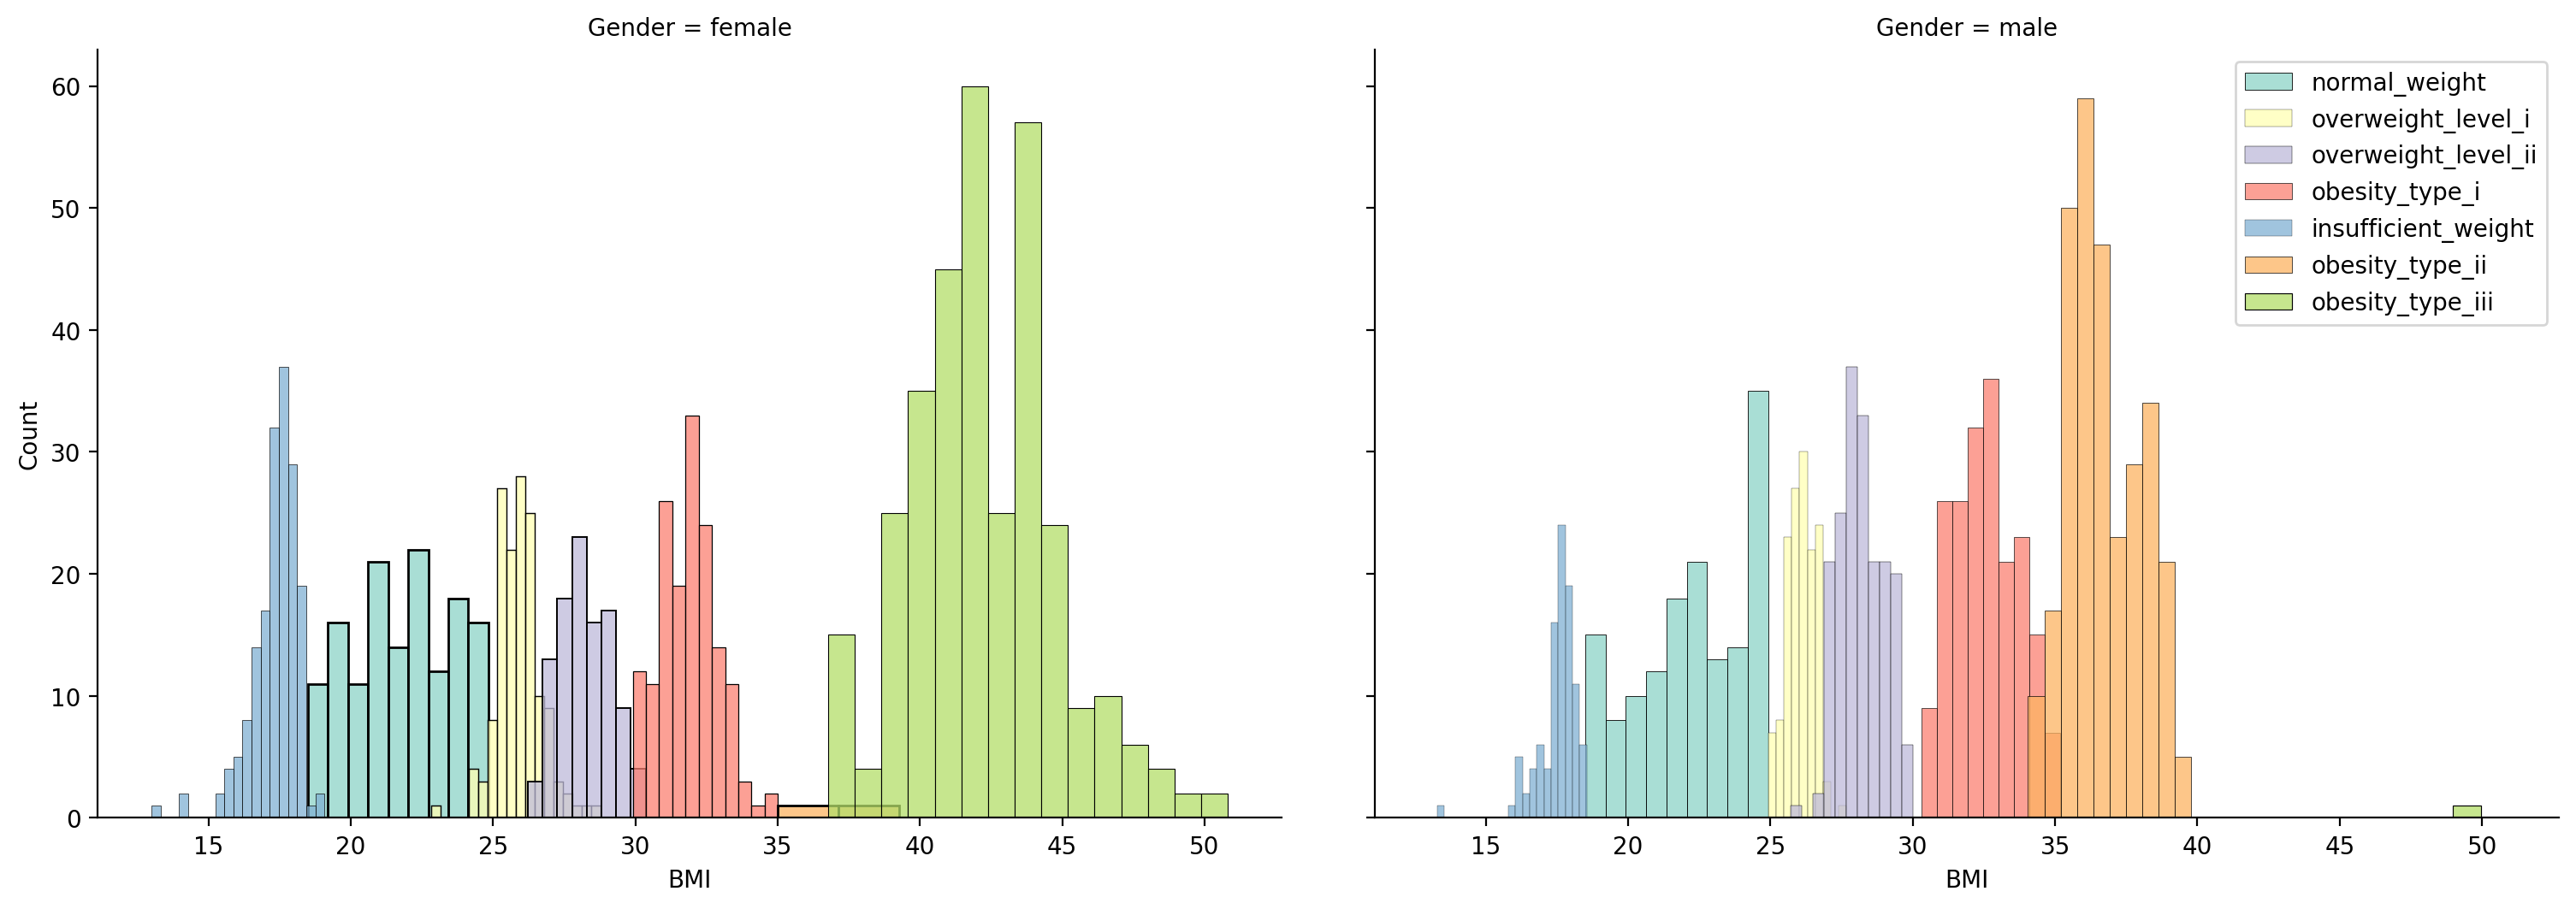

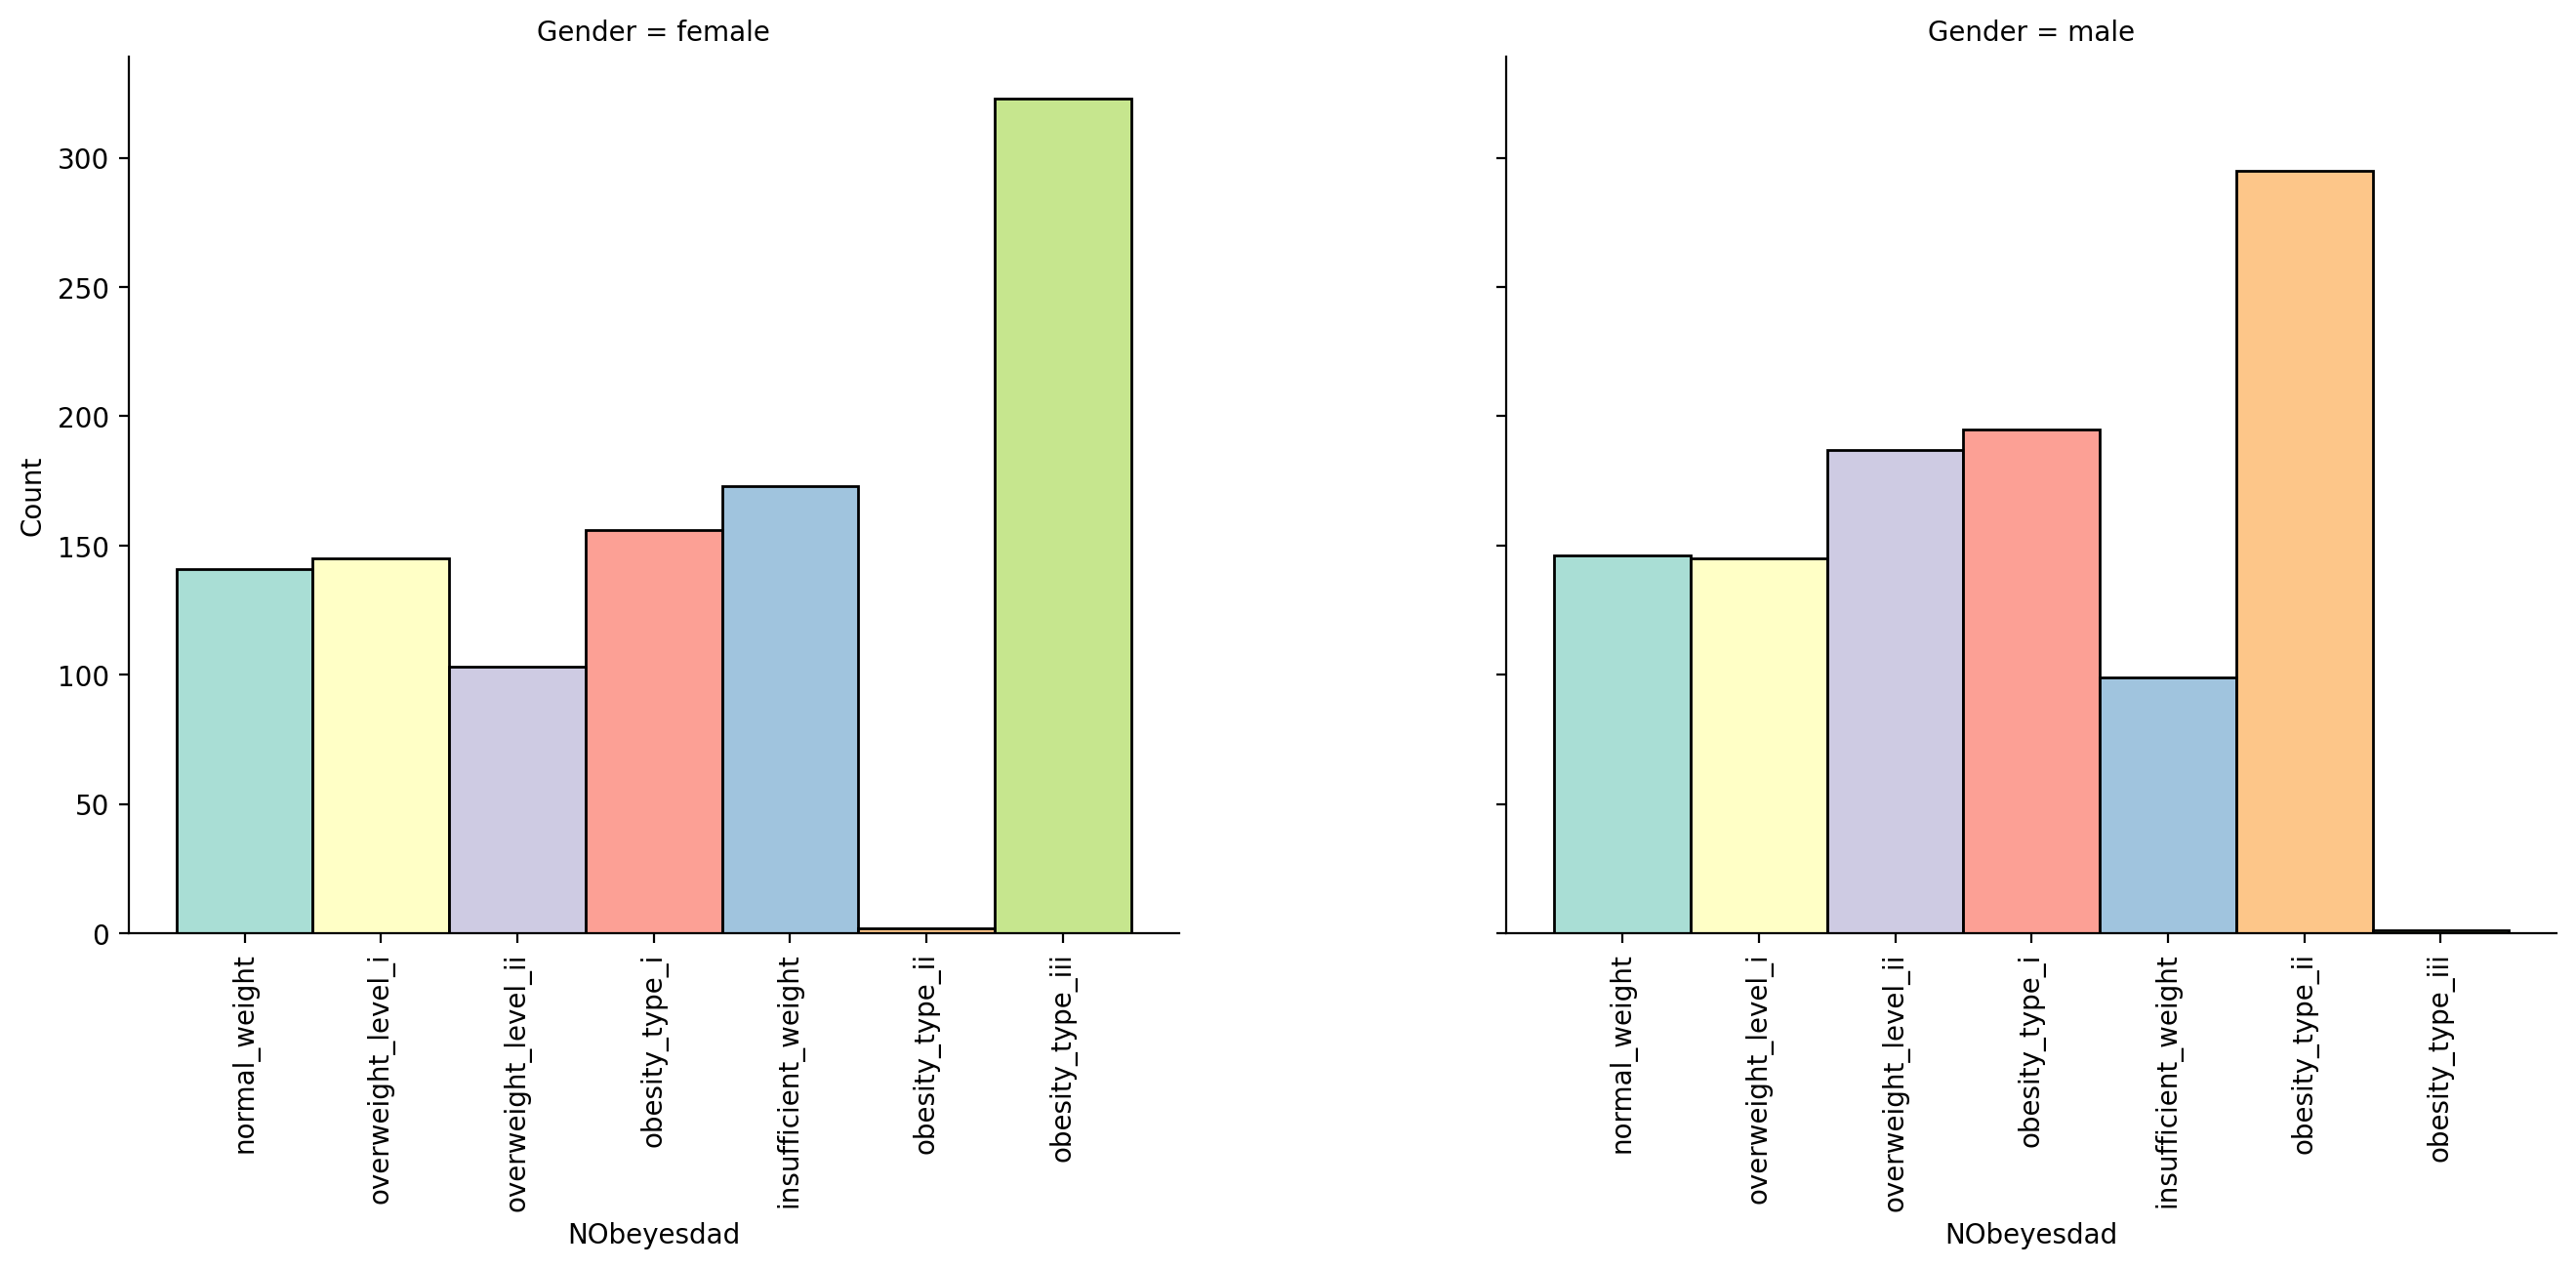

In [ ]:
byGender = sns.FacetGrid(df, col="Gender",hue="NObeyesdad",palette="Set3")
byGender.map(sns.histplot, "BMI")
plt.legend(loc='upper right')
fig = plt.gcf()
fig.set_size_inches(16.5, 6.5)

byGender = sns.FacetGrid(df, col="Gender",hue="NObeyesdad",palette="Set3")
byGender.map(sns.histplot, "NObeyesdad")
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in byGender.axes.flat]
fig = plt.gcf()
fig.set_size_inches(15.3, 6.5)

Perempuan telah menyumbang sebagian besar Obesitas Tipe I (Hijau). Pria memiliki distribusi lebih banyak untuk Obesitas Tipe II (Oranye). Dan jumlah Berat Badan Tidak Cukup (Cyan) untuk Wanita lebih tinggi daripada Pria. Selain itu, Pria memiliki jumlah yang lebih tinggi daripada Wanita baik untuk Kegemukan Tingkat I maupun Obesitas Tipe I. Sedangkan Berat Badan Normal dan Kegemukan Tingkat I memiliki nilai yang kurang lebih sama.

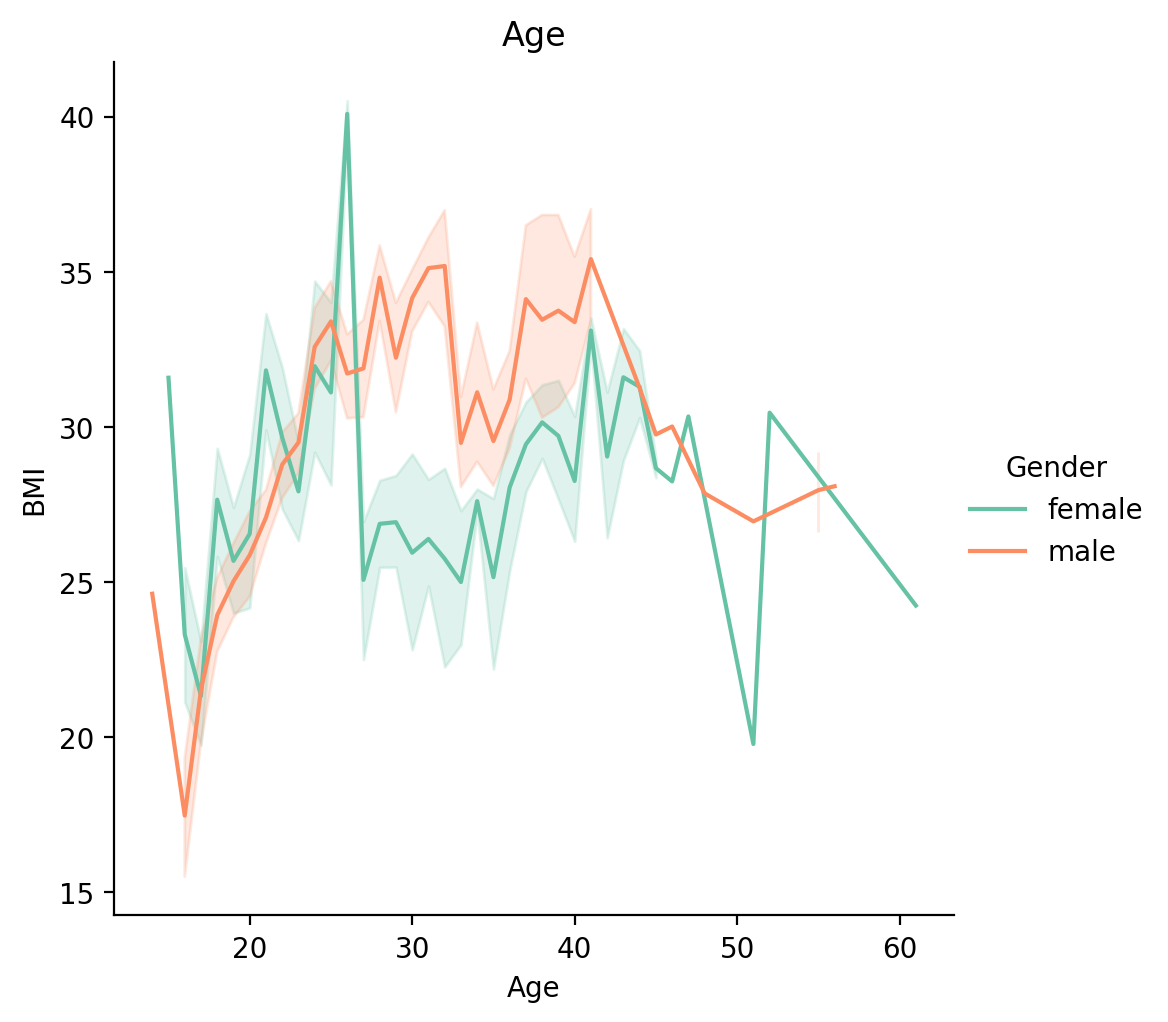

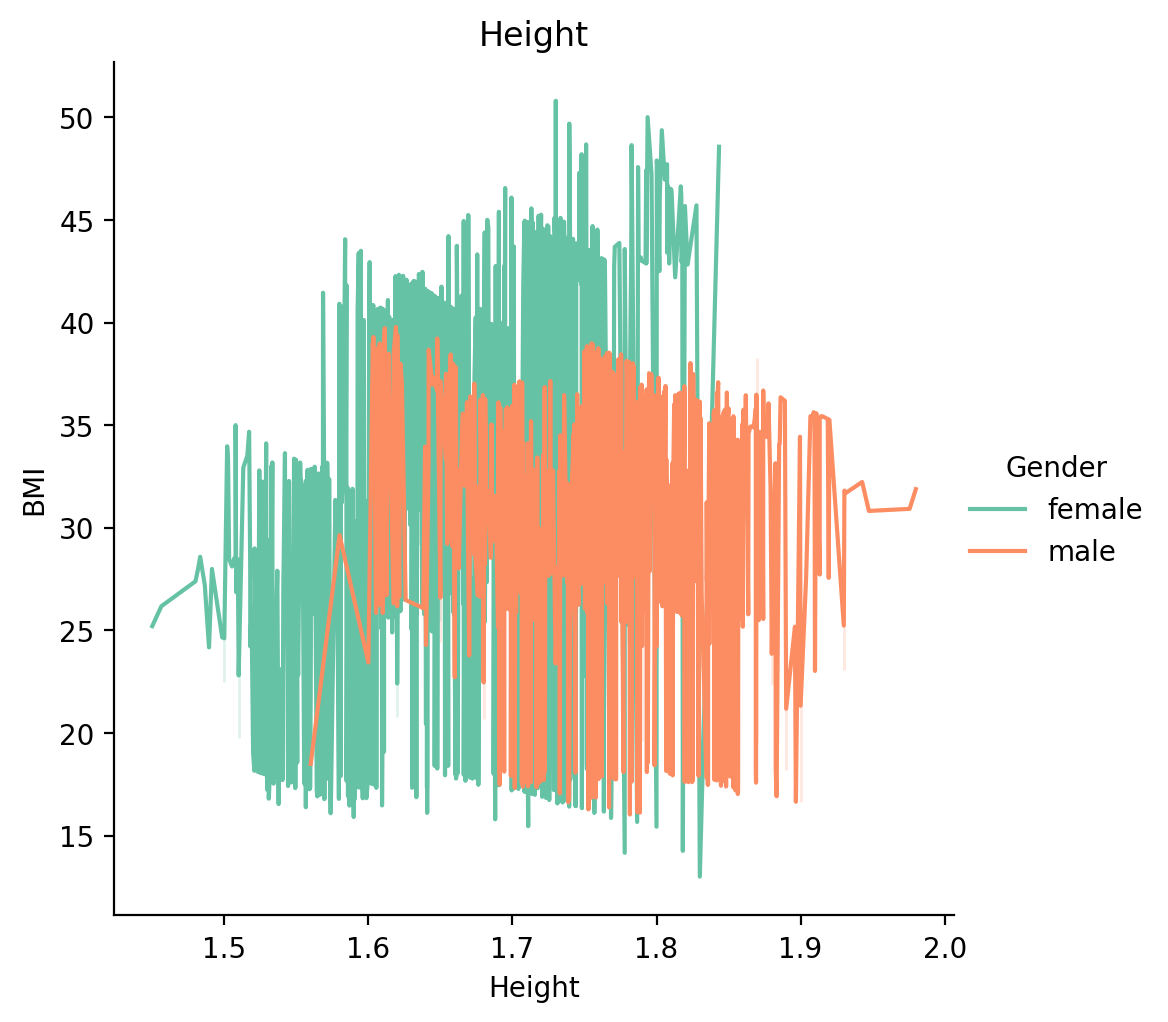

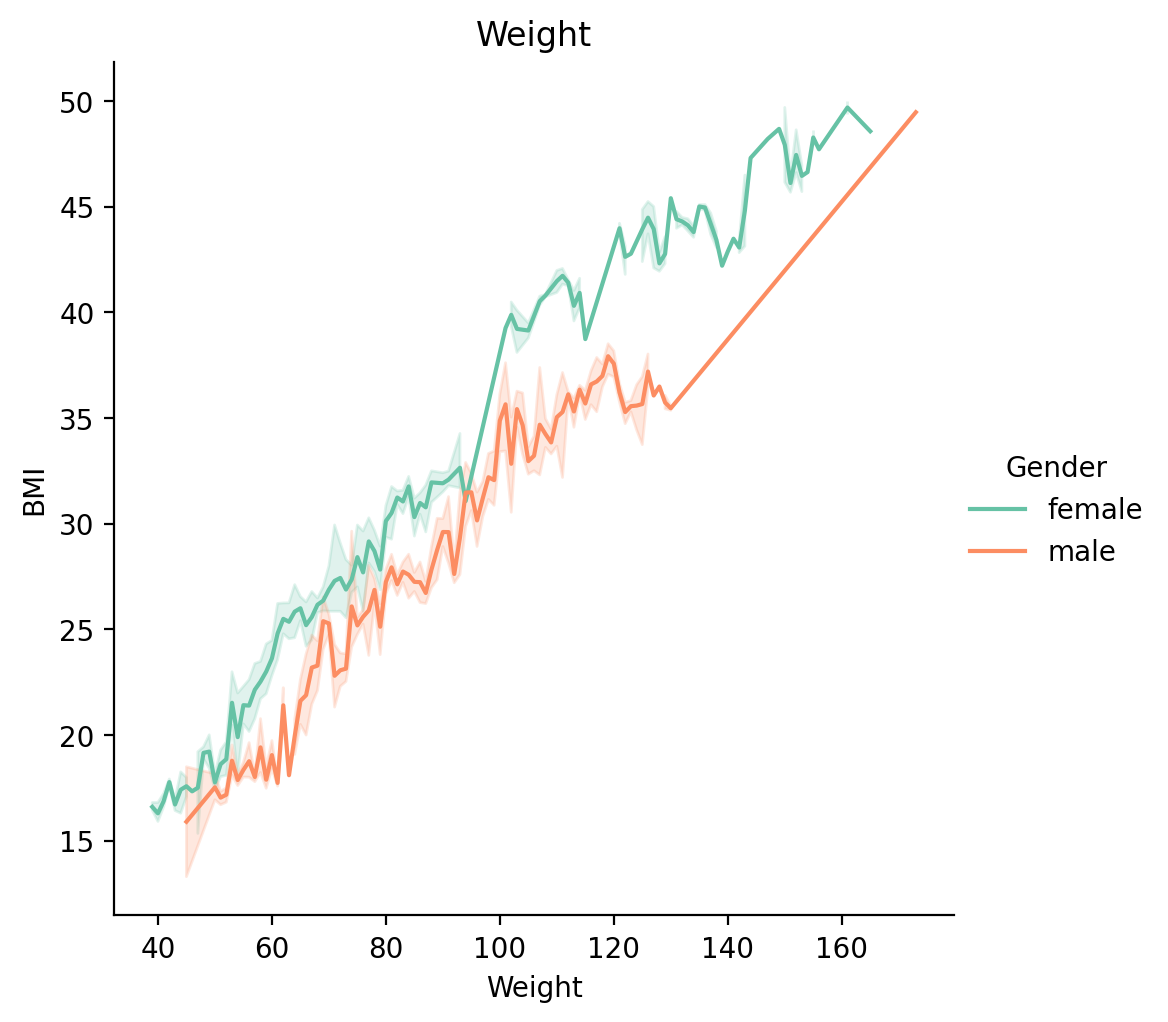

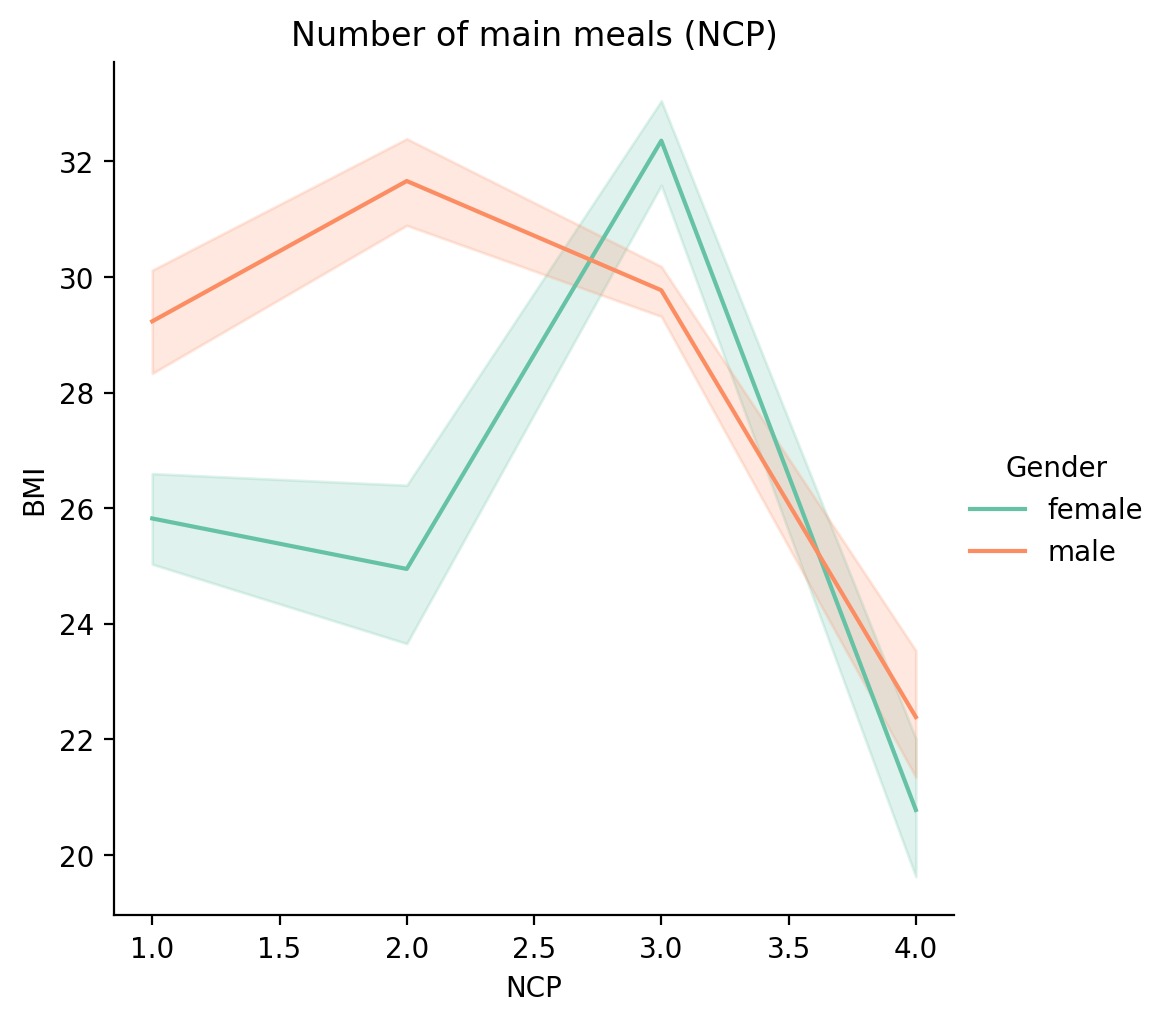

In [ ]:
import seaborn as sns
sns.relplot(x="Age", y="BMI", hue="Gender", kind="line", data=data, palette="Set2").set(title='Age')
sns.relplot(x="Height", y="BMI", hue="Gender", kind="line", data=data, palette="Set2").set(title='Height')
sns.relplot(x="Weight", y="BMI", hue="Gender", kind="line", data=data, palette="Set2").set(title='Weight')
sns.relplot(x="NCP", y="BMI", hue="Gender", kind="line", data=data, palette="Set2").set(title='Number of main meals (NCP)')

Untuk mengetahui korelasi antara keduanya, kami membandingkan BMI dengan semua variabel kontinyu menggunakan heatmap untuk masing-masing pria dan wanita.

<ipython-input-35-f60572a82686>:7: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-35-f60572a82686>:8: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



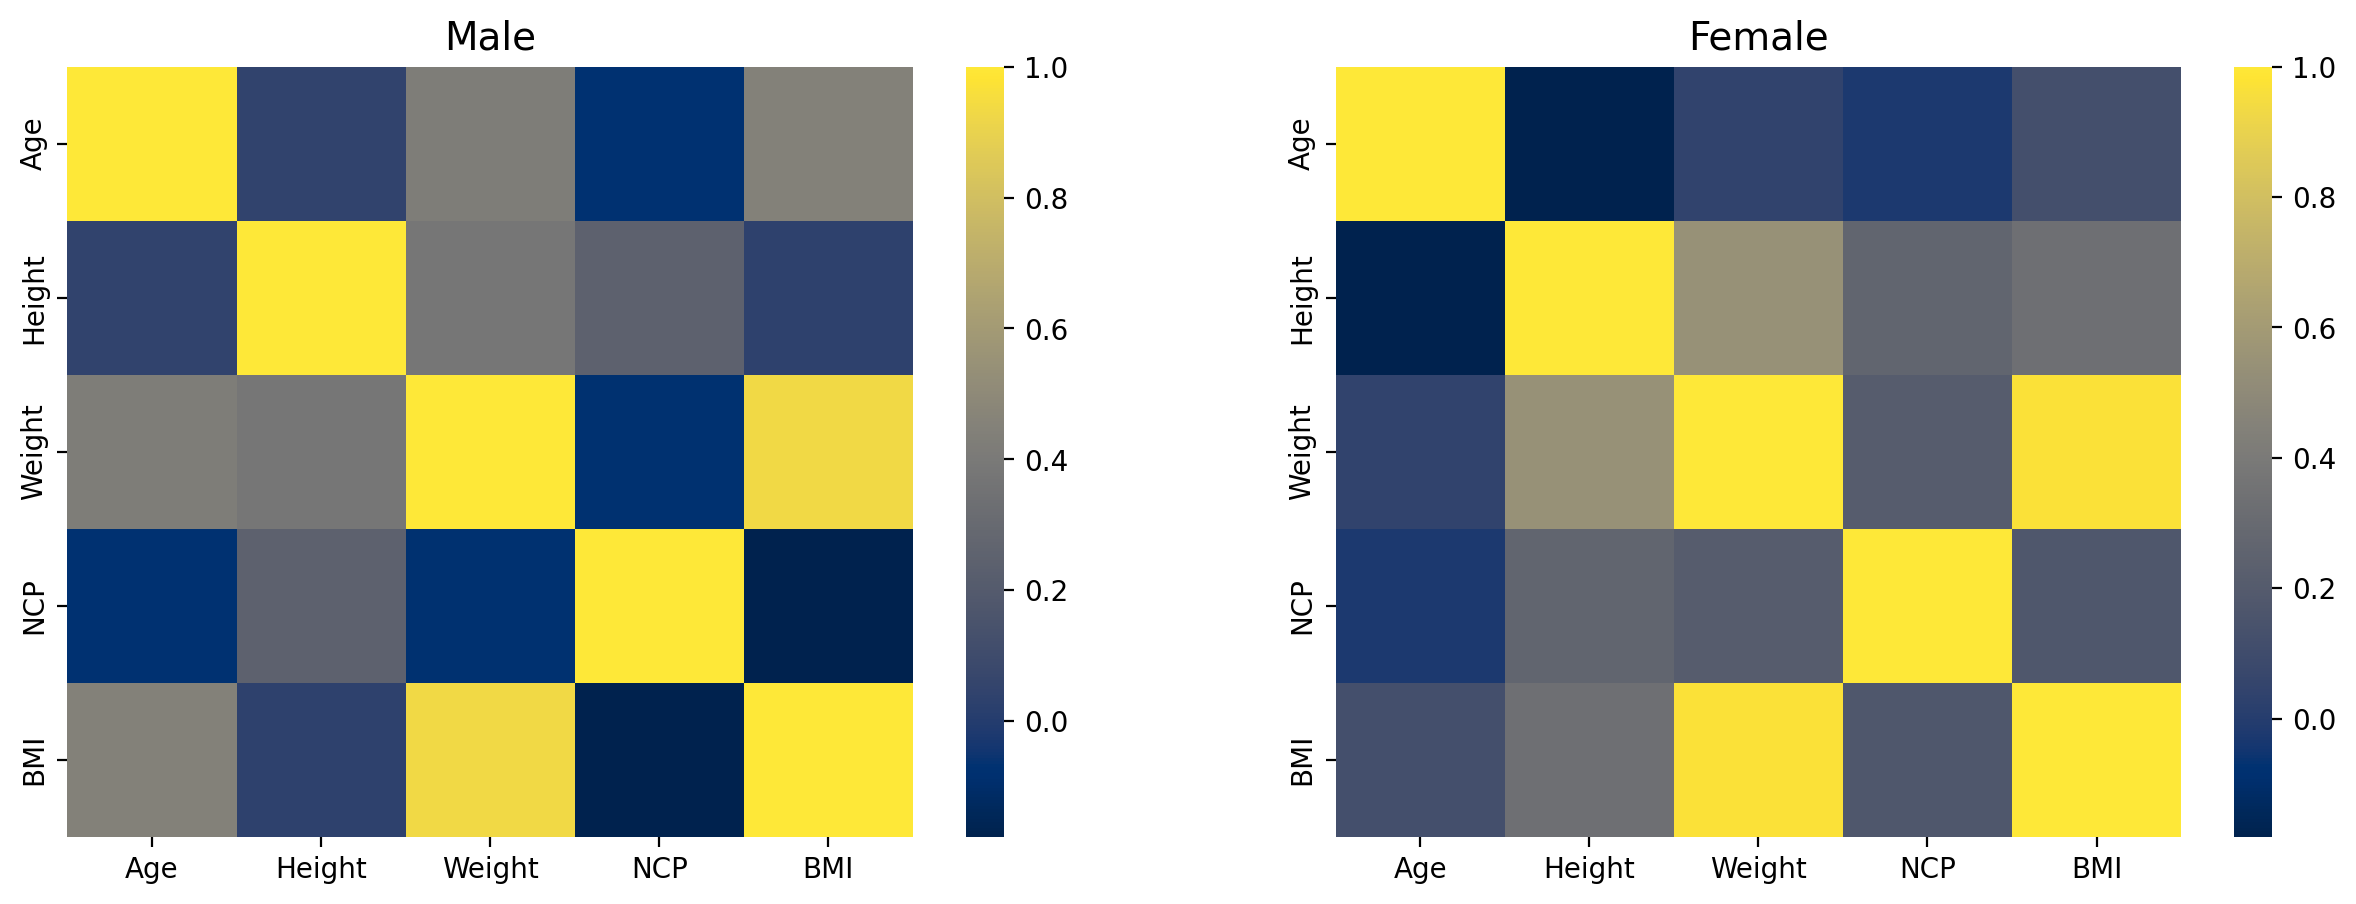

In [ ]:
male = data.loc[data.Gender == 'male']
female = data.loc[data.Gender == 'female']

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
ax1.set_title("Male", size = 14)
ax2.set_title("Female", size = 14)
sns.heatmap(male.corr(), cmap='cividis', ax=ax1)
sns.heatmap(female.corr(), cmap='cividis', ax=ax2)
plt.show()

Sebelum melihat peta panas hanya dengan menilai pemikiran logis kita, kita tahu bahwa tinggi dan berat badan tidak akan memberikan apa yang kita inginkan. Jadi kita bisa membandingkan Umur dan NCP dengan BMI.


Untuk wanita:

- Umur = korelasi positif sedang | korelasi positif yang lemah
- NCP = tidak ada korelasi

Untuk pria:
- Umur = korelasi positif lemah | tidak ada korelasi
- NCP = tidak ada korelasi

Jadi kita dapat mengatakan bahwa dari hasil yang kit lihat, wanita mungkin menderita BMI lebih tinggi pada usia yang lebih tua daripada pria.

Kemudian, kami melihat ke dalam data kategorikal. Ini dapat dibagi menjadi sekitar 3 bagian.

Kategori data

1. Kebiasaan makan
2. Pembakaran kalori
3. dll


Bagian 1: Kebiasaan makan

- Sering konsumsi makanan berkalori tinggi (FAVC)
- Frekuensi Konsumsi Sayuran (FCVC)
- Konsumsi makanan di antara waktu makan (CAEC)
- Konsumsi air setiap hari (CH20)
- Konsumsi alkohol (CALC)

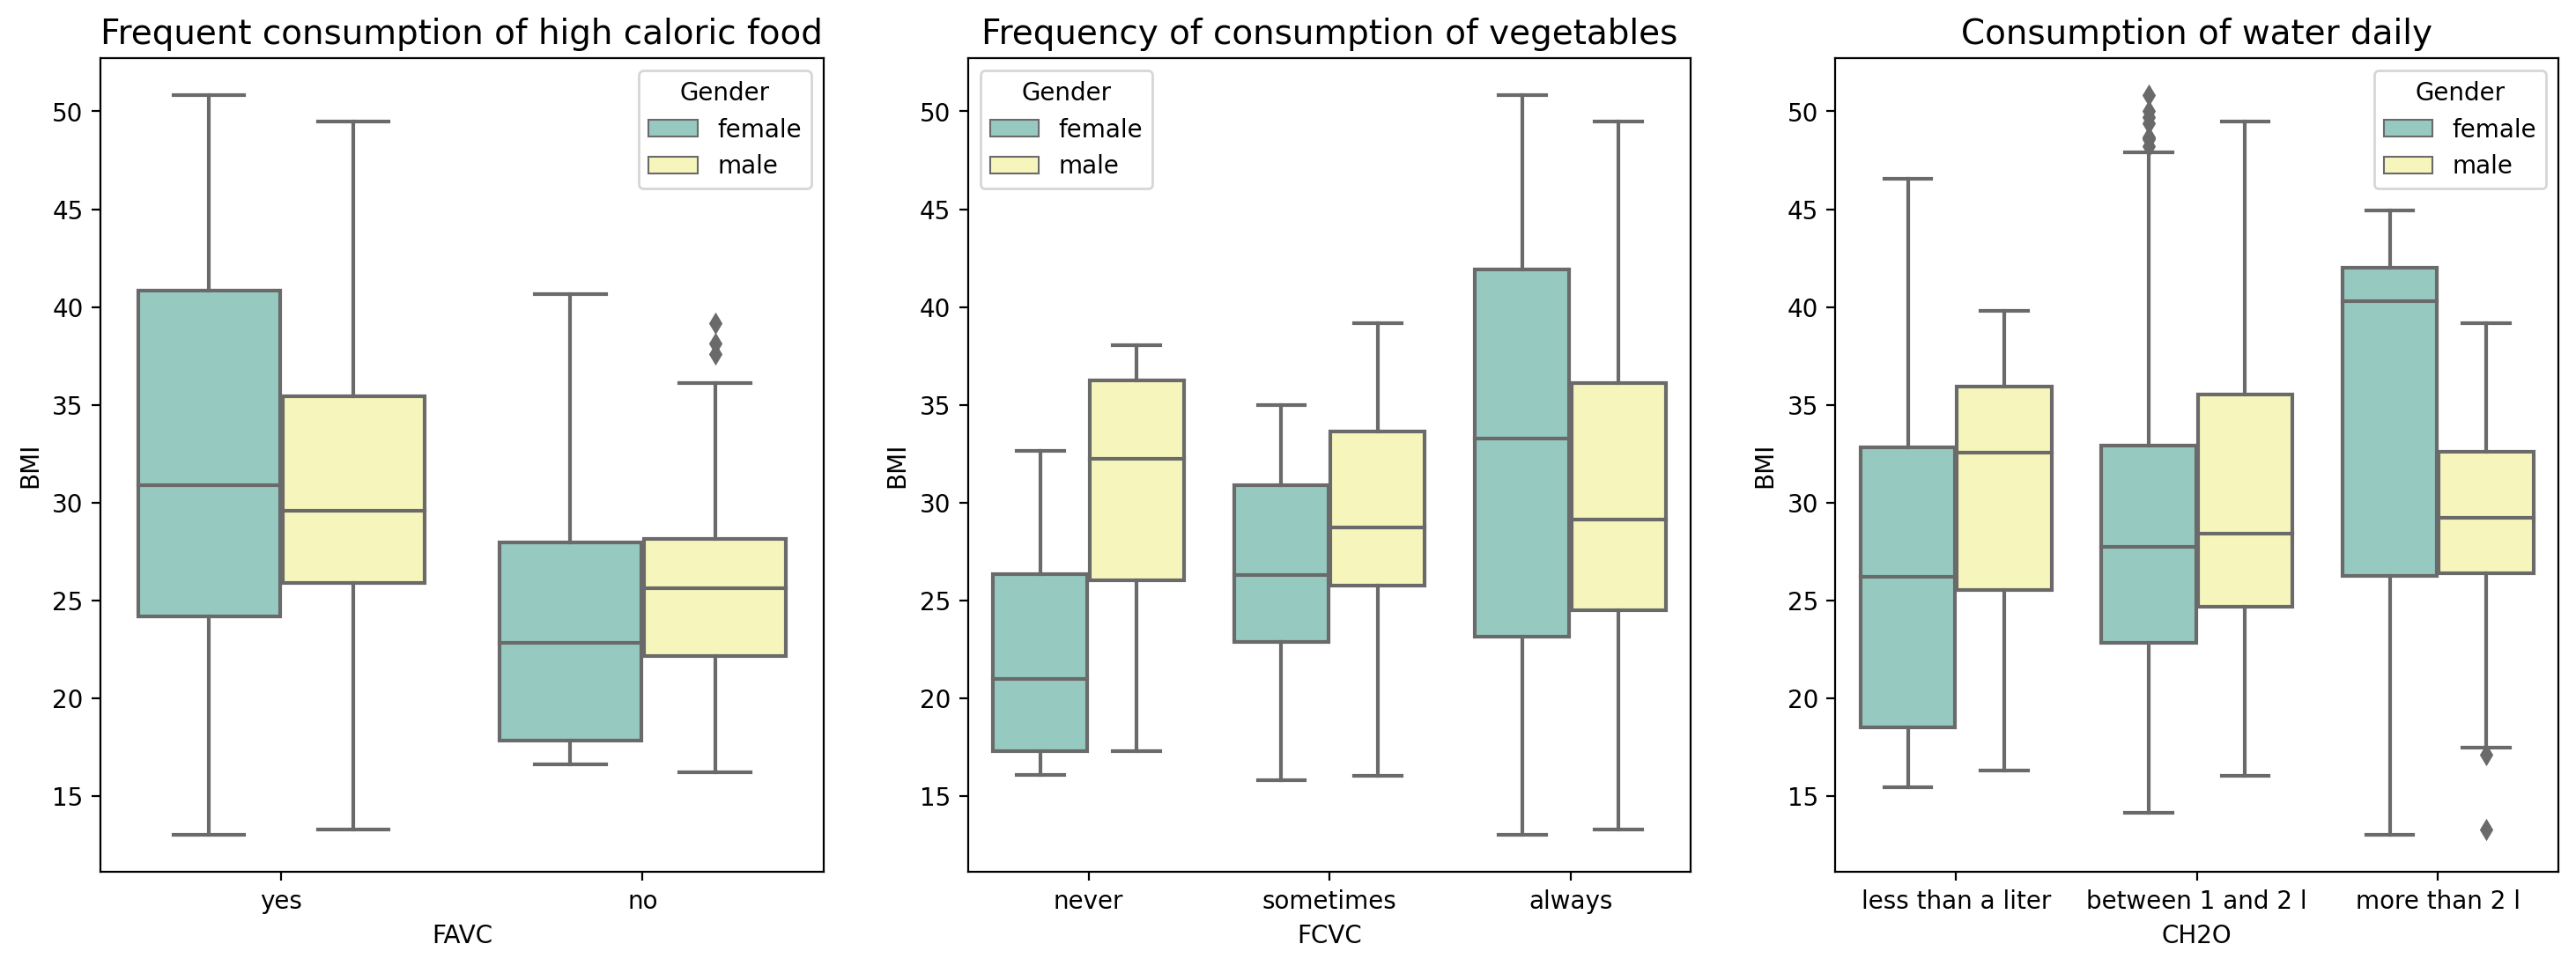

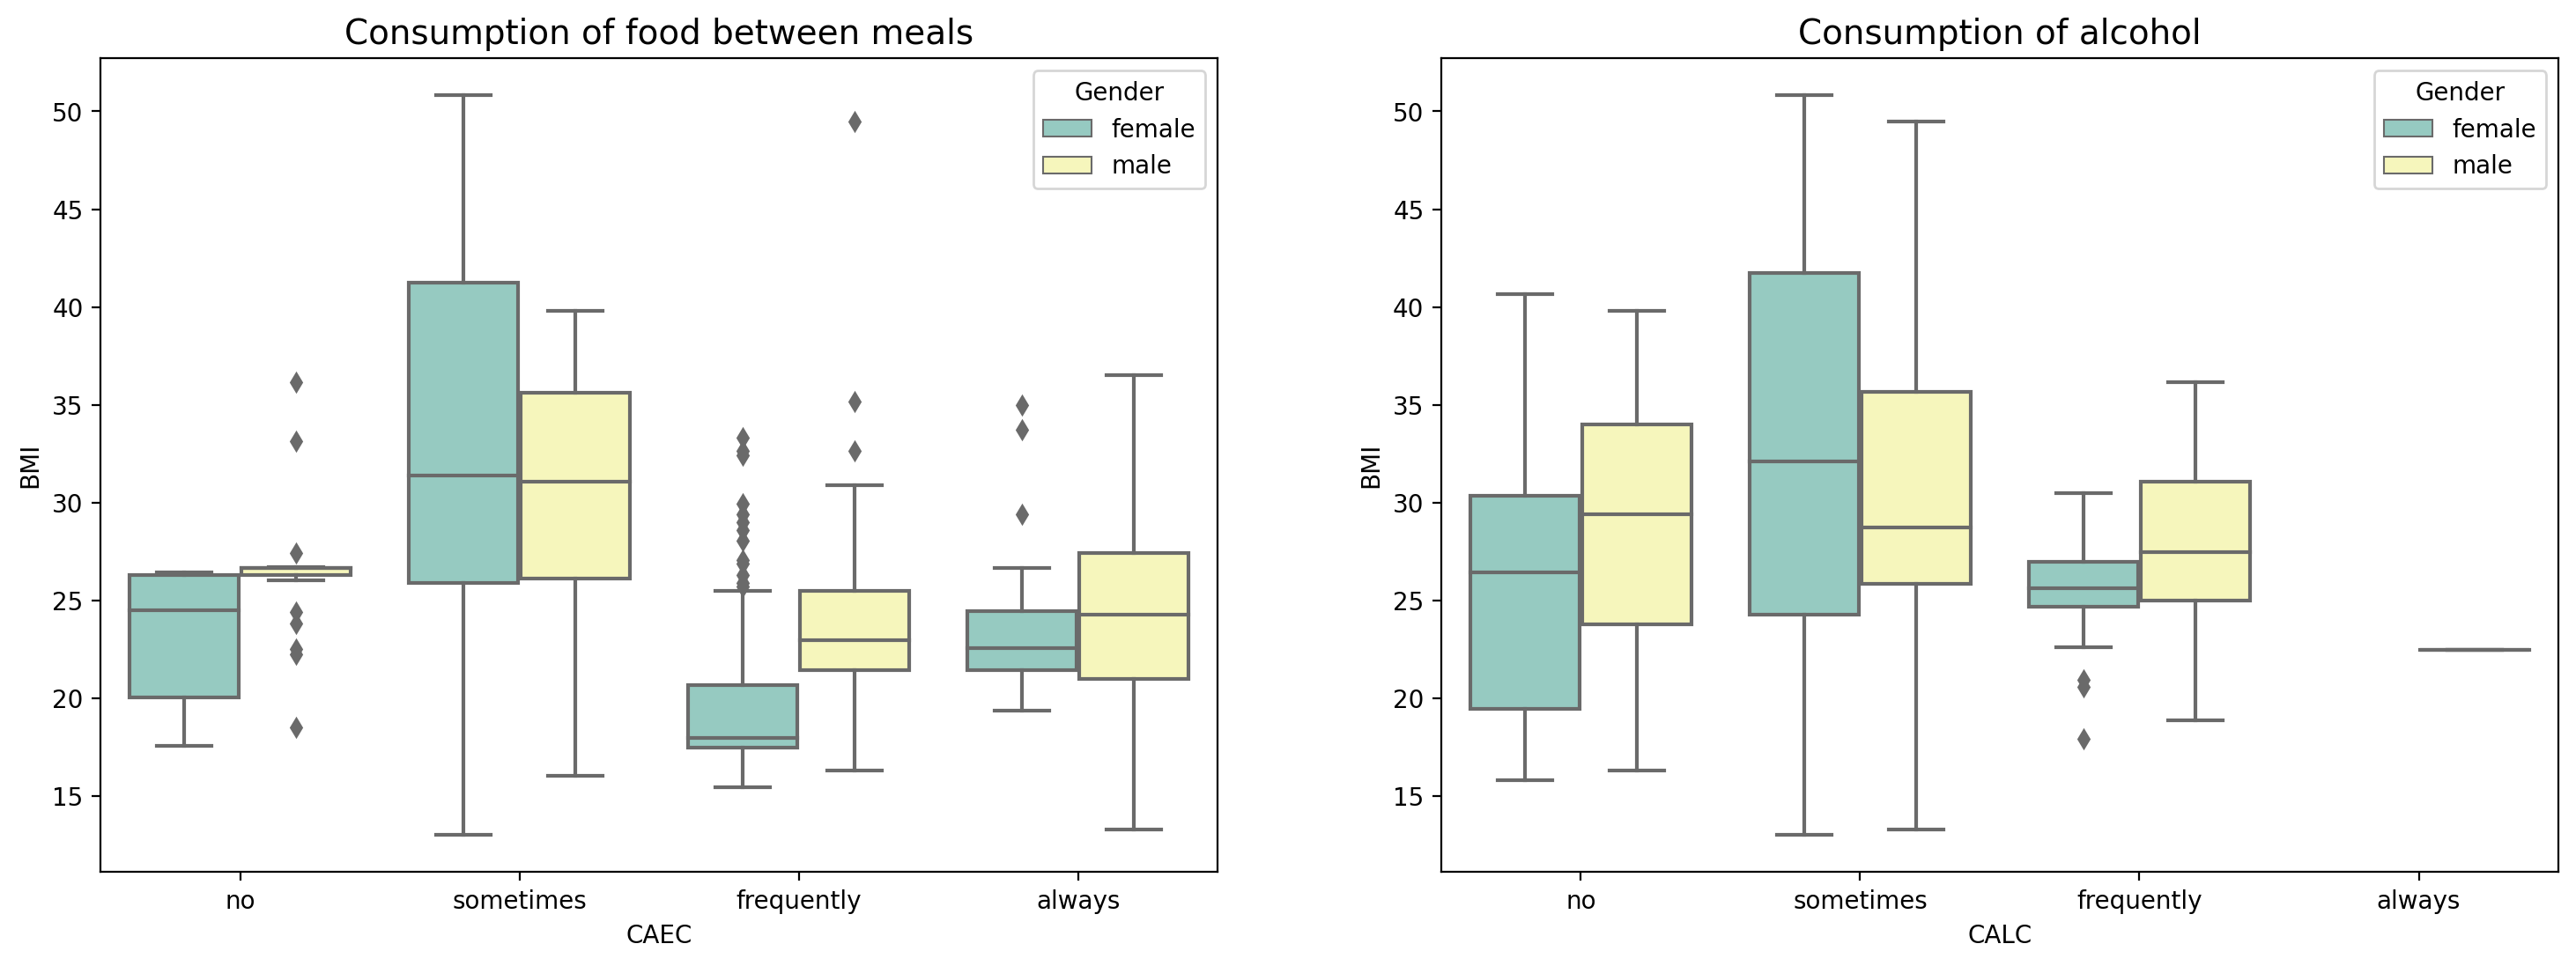

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(18,6))

ax1.set_title("Frequent consumption of high caloric food", size = 14)
ax2.set_title("Frequency of consumption of vegetables", size = 14)
ax3.set_title("Consumption of water daily", size = 14)

sns.boxplot(x="FAVC", y="BMI", hue="Gender",data=data, palette="Set3",
                       order=["yes",'no'], ax=ax1)
sns.boxplot(x="FCVC", y="BMI", hue="Gender",data=data, palette="Set3",
                       order=['never','sometimes','always'], ax=ax2)
sns.boxplot(x="CH2O", y="BMI", hue="Gender",data=data, palette="Set3",
                       order=["less than a liter","between 1 and 2 l","more than 2 l"],ax=ax3)
plt.show()
fig, (ax4, ax5) = plt.subplots(1,2,figsize=(18,6))

ax4.set_title("Consumption of food between meals", size = 14)
ax5.set_title("Consumption of alcohol", size = 14)

sns.boxplot(x="CAEC", y="BMI", hue="Gender",data=data, palette="Set3",
            order=["no",'sometimes','frequently','always'],ax=ax4)
sns.boxplot(x="CALC", y="BMI", hue="Gender",data=data, palette="Set3",
                        order=["no",'sometimes','frequently','always'],ax=ax5)
plt.show()

Bagian 2: Pembakaran kalori
- Pemantauan konsumsi kalori (SCC)
- Frekuensi aktivitas fisik (FAF)
- Waktu menggunakan perangkat teknologi (TUE)
- Transportasi yang digunakan (MTRANS)

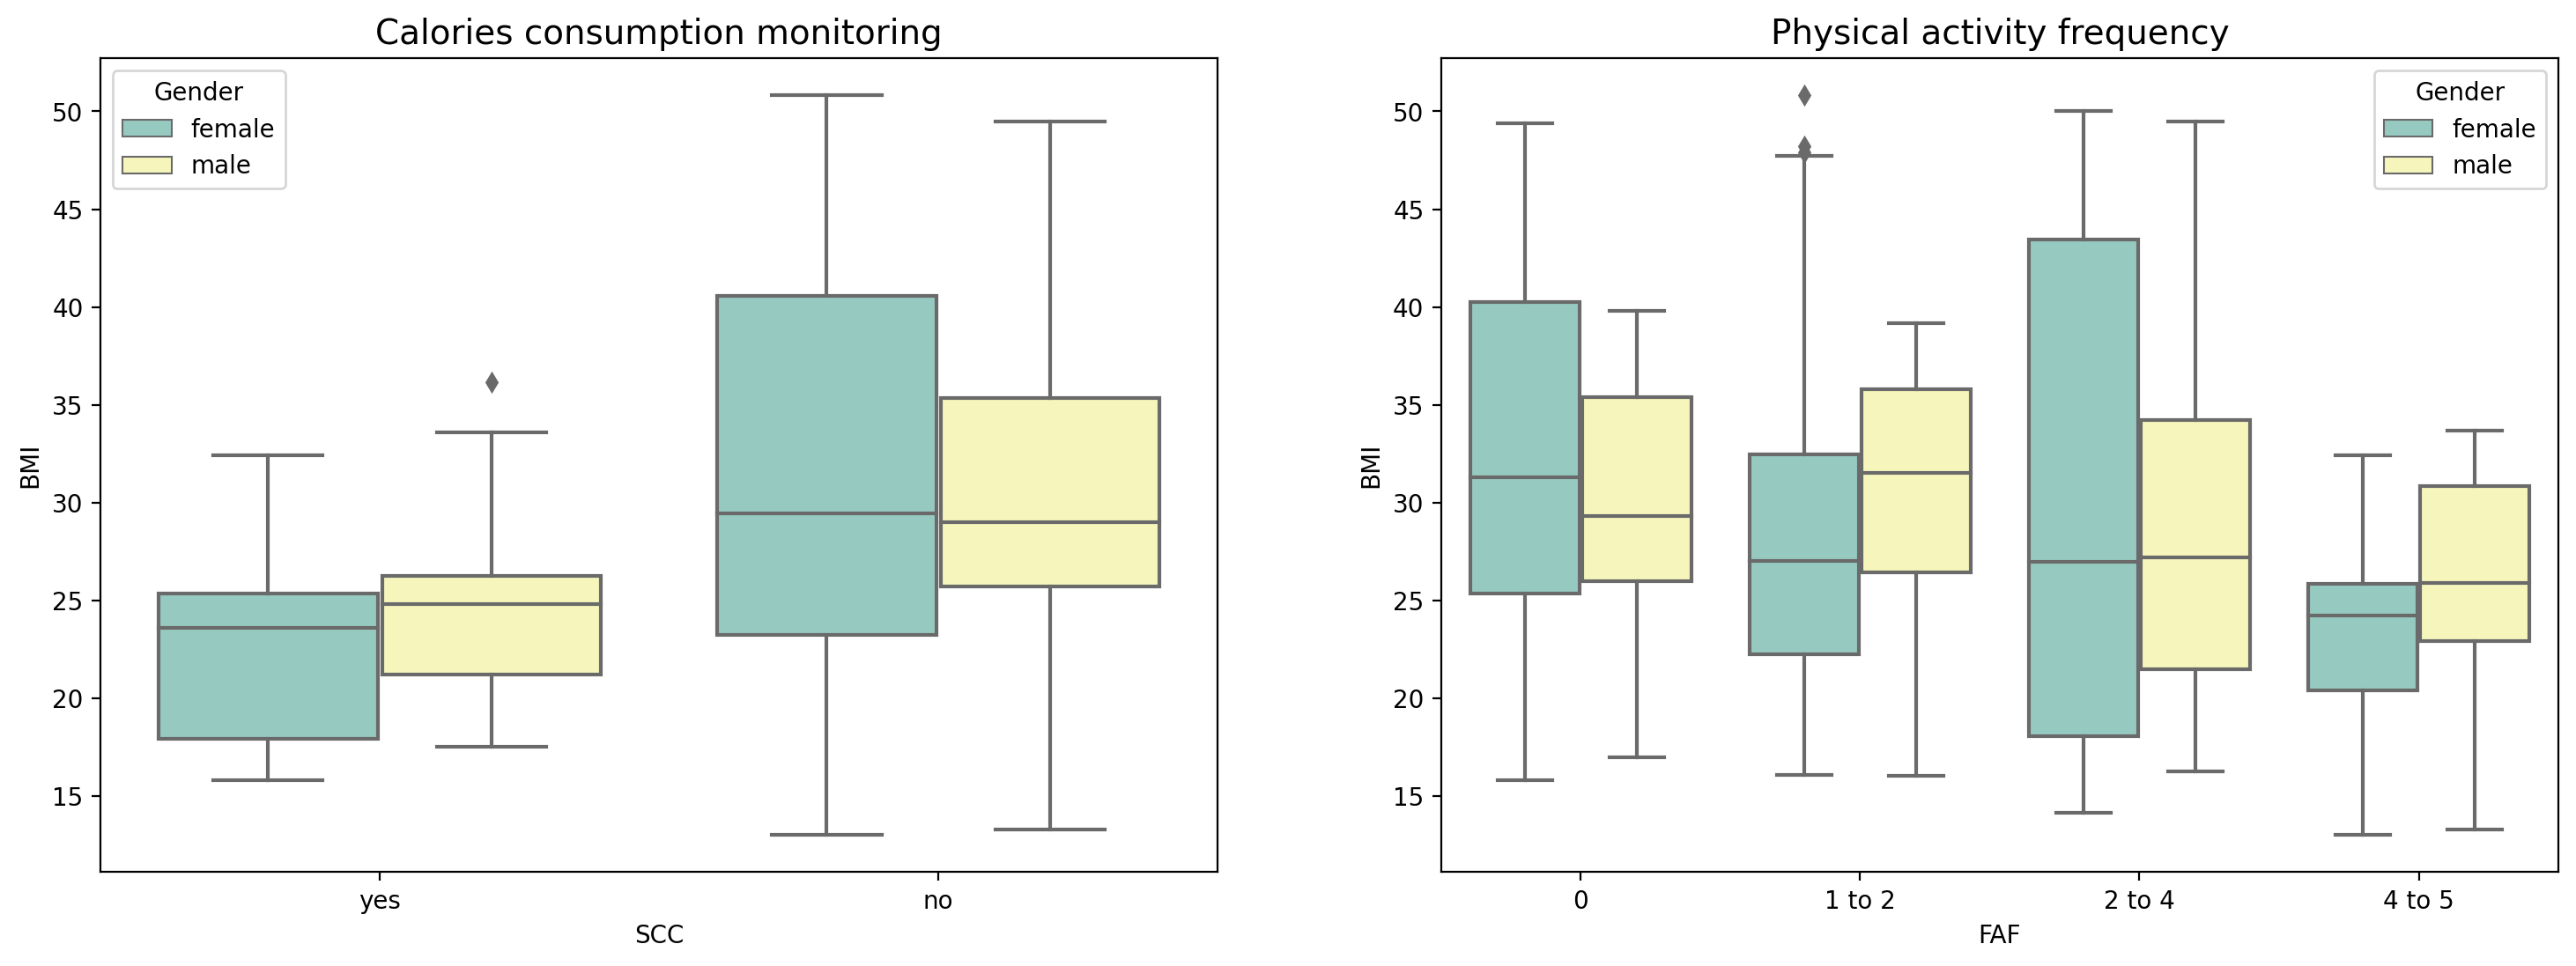

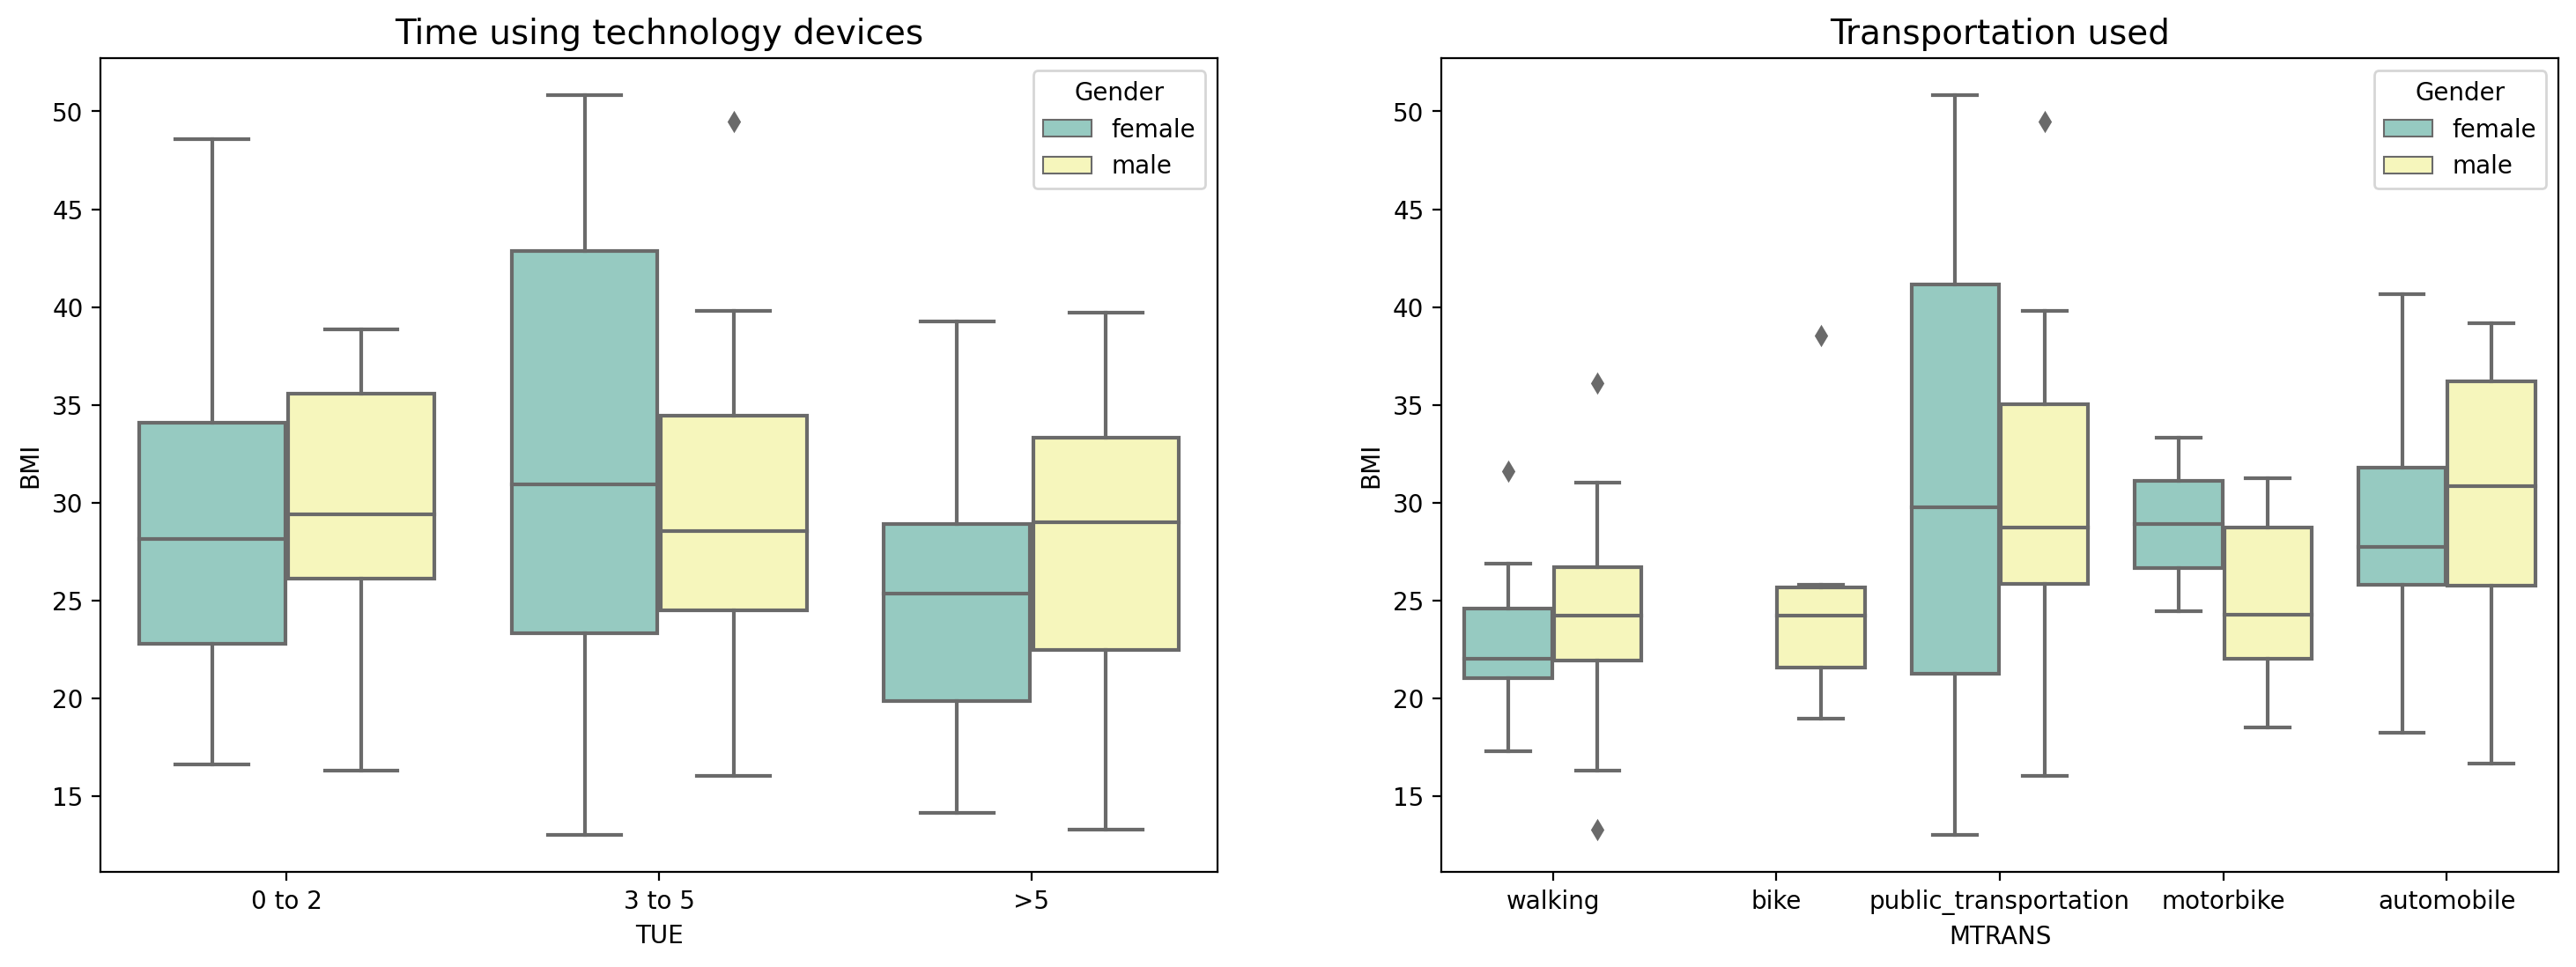

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(18,6))

ax1.set_title("Calories consumption monitoring", size = 14)
ax2.set_title("Physical activity frequency", size = 14)

sns.boxplot(x="SCC", y="BMI", hue="Gender",data=data, palette="Set3",
            order=["yes",'no'], ax=ax1)
sns.boxplot(x="FAF", y="BMI", hue="Gender",data=data, palette="Set3",
            order=["0","1 to 2","2 to 4","4 to 5"], ax=ax2)

fig, (ax3, ax4) = plt.subplots(1,2,figsize=(18,6))

ax3.set_title("Time using technology devices", size = 14)
ax4.set_title("Transportation used", size = 14)

sns.boxplot(x="TUE", y="BMI", hue="Gender",data=data, palette="Set3",
            order=["0 to 2","3 to 5",">5"], ax=ax3)
sns.boxplot(x="MTRANS", y="BMI", hue="Gender",data=data, palette="Set3",order=["walking", "bike", "public_transportation", "motorbike", "automobile"], ax=ax4)

plt.show()

Bagian 3: Lainnya
- family_history_with_overweight
MEROKOK

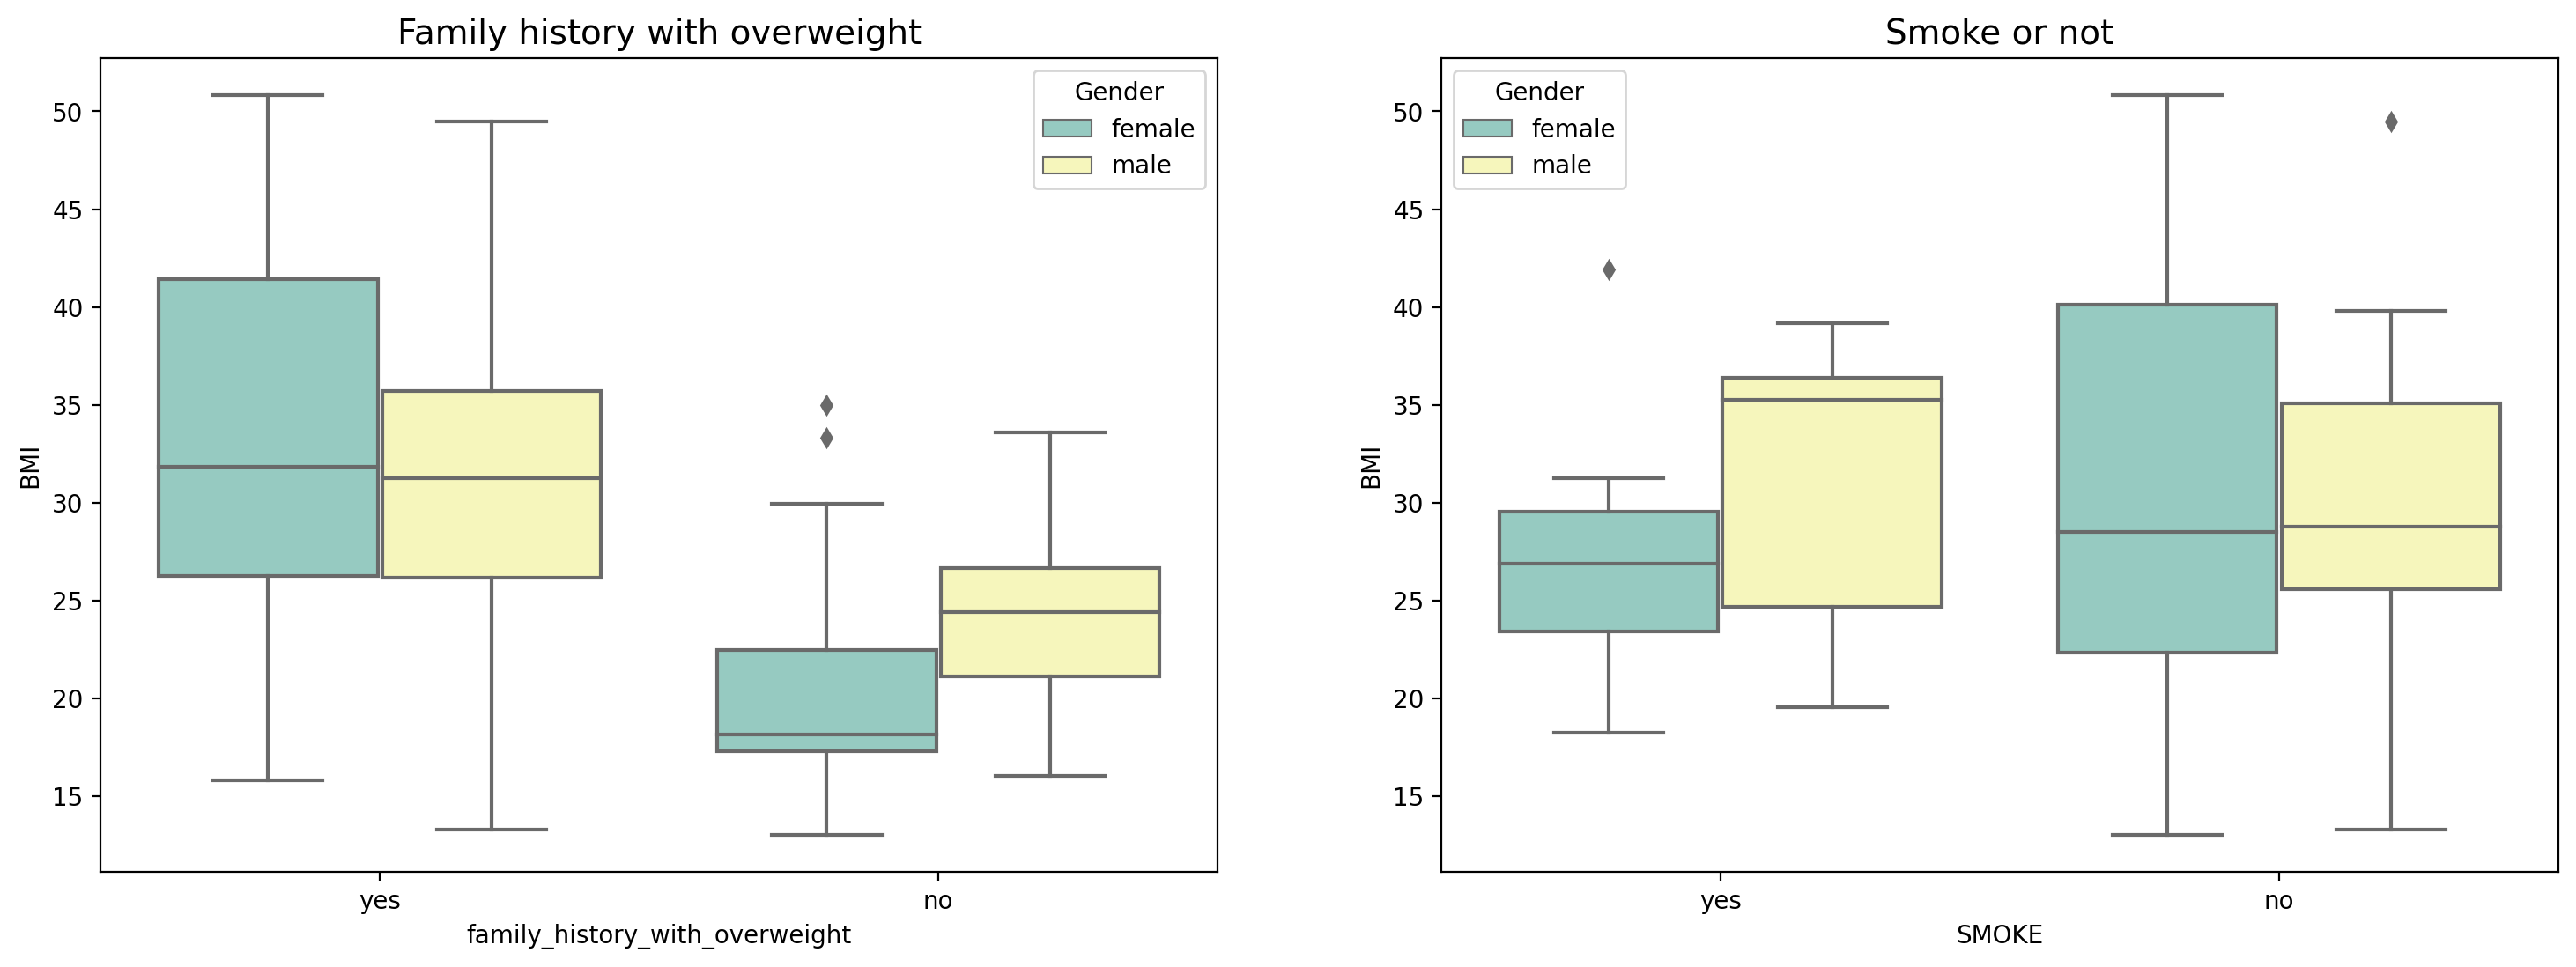

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(18,6))

ax1.set_title("Family history with overweight", size = 14)
ax2.set_title("Smoke or not", size = 14)

sns.boxplot(x="family_history_with_overweight", y="BMI", hue="Gender",data=data, palette="Set3",
            order=["yes",'no'], ax=ax1)
sns.boxplot(x="SMOKE", y="BMI", hue="Gender",data=data, palette="Set3",
            order=["yes",'no'], ax=ax2)

plt.show()

Hasil : Berdasarkan analisis dan ringkasan, diperoleh hasil bahwa faktor-faktor seperti jumlah makan, konsumsi makanan di antara waktu makan, dan konsumsi alkohol tidak menunjukkan adanya korelasi dengan obesitas baik pada perempuan maupun laki-laki. Untuk faktor yang berbeda, ada beberapa dampak yang berbeda berdasarkan jenis kelamin. Perempuan secara keseluruhan lebih mudah dipengaruhi oleh faktor lain dibandingkan laki-laki. 10 dari 15 variabel tampaknya memiliki semacam korelasi di antara mereka. Di sisi lain, laki-laki kurang terpengaruh oleh faktor-faktor ini.

##Feature

In [ ]:
# Identifikasi feature berdasarkan tipe datanya
temp = (df.dtypes == 'object')
cat_cols = list(temp[temp].index)
print(f"{len(cat_cols)} categorical features:\n{cat_cols}")

temp = (df.dtypes == 'float64')
float64_cols = list(temp[temp].index)
print(f"\n{len(float64_cols)} float64 features:\n{float64_cols}")

temp = (df.dtypes == 'int64')
int64_cols = list(temp[temp].index)
print(f"\n{len(int64_cols)} int features:\n{int64_cols}")

temp = (df.dtypes == np.number)
num_cols = list(temp[temp].index)
print(f"\n{len(num_cols)} numpy.number features:\n{num_cols}")

13 categorical features:
['Gender', 'family_history_with_overweight', 'FAVC', 'FCVC', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']

2 float64 features:
['Height', 'BMI']

3 int features:
['Age', 'Weight', 'NCP']

2 numpy.number features:
['Height', 'BMI']


In [ ]:
# Categorical Feature
df[cat_cols].describe()

,Gender,family_history_with_overweight,FAVC,FCVC,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,3,4,2,3,2,4,3,4,5,7
top,male,yes,yes,sometimes,sometimes,no,between 1 and 2 l,no,1 to 2,0 to 2,sometimes,public_transportation,obesity_type_i
freq,1068,1726,1866,1013,1765,2067,1110,2015,776,952,1401,1580,351


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Gender'] = labelencoder.fit_transform(df['Gender'])
df['Age'] = labelencoder.fit_transform(df['Age'])
df['Height'] = labelencoder.fit_transform(df['Height'])
df['Weight'] = labelencoder.fit_transform(df['Weight'])
df['family_history_with_overweight'] = labelencoder.fit_transform(df['family_history_with_overweight'])
df['FAVC'] = labelencoder.fit_transform(df['FAVC'])
df['FCVC'] = labelencoder.fit_transform(df['FCVC'])
df['NCP'] = labelencoder.fit_transform(df['NCP'])
df['CAEC'] = labelencoder.fit_transform(df['CAEC'])
df['SMOKE'] = labelencoder.fit_transform(df['SMOKE'])
df['CH2O'] = labelencoder.fit_transform(df['CH2O'])
df['SCC'] = labelencoder.fit_transform(df['SCC'])
df['FAF'] = labelencoder.fit_transform(df['FAF'])
df['TUE'] = labelencoder.fit_transform(df['TUE'])
df['CALC'] = labelencoder.fit_transform(df['CALC'])
df['MTRANS'] = labelencoder.fit_transform(df['MTRANS'])
df['NObeyesdad'] = labelencoder.fit_transform(df['NObeyesdad'])
df['BMI'] = labelencoder.fit_transform(df['BMI'])
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
id,,,,,,,,,,,,,,,,,,
1,0,7,295,25,1,0,2,2,3,0,0,0,0,1,2,3,1,453
2,0,7,28,17,1,0,0,2,3,1,2,1,3,0,3,3,1,441
3,1,9,1306,38,1,0,2,2,3,0,0,0,2,1,1,3,1,419
4,1,13,1306,48,0,0,0,2,3,0,0,0,2,0,1,4,5,723
5,1,8,1202,51,0,0,2,0,3,0,0,0,0,0,3,3,6,889


Random Forest Regres

In [ ]:
#Train Test Split
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

X= df[["NObeyesdad"]]
y= df[["FAF"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Random Forest Regressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, np.ravel(y_train))

RandomForestRegressor()

In [ ]:
from sklearn.metrics import r2_score

y_pred = rf_regressor.predict(X_test)
y_pred_train = rf_regressor.predict(X_train)


print(f"Evaluasi R-Square Data Train {r2_score(y_train, y_pred_train)}")
print(f"Evaluasi R-Square Data Test {r2_score(y_test, y_pred)}")

Evaluasi R-Square Data Train 0.05372073198586713
Evaluasi R-Square Data Test 0.01157837180753396


Decission Tree

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('family_history_with_overweight', axis=1)
y = df.family_history_with_overweight

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0       1  accuracy  macro avg  weighted avg
precision    1.0     1.0       1.0        1.0           1.0
recall       1.0     1.0       1.0        1.0           1.0
f1-score     1.0     1.0       1.0        1.0           1.0
support    262.0  1215.0       1.0     1477.0        1477.0
_______________________________________________
Confusion Matrix: 
 [[ 262    0]
 [   0 1215]]

Test Result:
Accuracy Score: 85.96%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.654545    0.902672  0.859621    0.778609      0.854534
recall       0.585366    0.925636  0.859621    0.755501      0.859621
f1-score     0.618026    0.914010  0.859621    0.766018      0.856587
support    123.000000  511.000000  0.859621  634.000000    634.000000
______________________________________

#Data Modelling

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Membaca dataset
dataset = pd.read_csv('/content/sample_data/ObesityDataSet_cleaned_and_data_sinthetic.csv')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2111 non-null   object 
 1   Gender                          2111 non-null   object 
 2   Age                             2111 non-null   int64  
 3   Height                          2111 non-null   float64
 4   Weight                          2111 non-null   int64  
 5   family_history_with_overweight  2111 non-null   object 
 6   FAVC                            2111 non-null   object 
 7   FCVC                            2111 non-null   object 
 8   NCP                             2111 non-null   int64  
 9   CAEC                            2111 non-null   object 
 10  SMOKE                           2111 non-null   object 
 11  CH2O                            2111 non-null   object 
 12  SCC                             21

In [ ]:
dataset.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,1,female,21,1.62,64,yes,no,sometimes,3,sometimes,no,between 1 and 2 l,no,0,3 to 5,no,public_transportation,normal_weight,24.386526
1,2,female,21,1.52,56,yes,no,always,3,sometimes,yes,more than 2 l,yes,4 to 5,0 to 2,sometimes,public_transportation,normal_weight,24.238227
2,3,male,23,1.80,77,yes,no,sometimes,3,sometimes,no,between 1 and 2 l,no,2 to 4,3 to 5,frequently,public_transportation,normal_weight,23.765432
3,4,male,27,1.80,87,no,no,always,3,sometimes,no,between 1 and 2 l,no,2 to 4,0 to 2,frequently,walking,overweight_level_i,26.851852
4,5,male,22,1.78,90,no,no,sometimes,1,sometimes,no,between 1 and 2 l,no,0,0 to 2,sometimes,public_transportation,overweight_level_ii,28.342381


Data Preprocessing

In [ ]:
# Mengidentifikasi missing values
missing_values = dataset.isnull().sum()
print("Jumlah missing values:\n", missing_values)

# Mengatasi missing values dengan menghapus baris yang memiliki missing values
dataset_cleaned = dataset.dropna()

# Menampilkan informasi dataset setelah data cleaning
print("Informasi dataset setelah data cleaning:\n", dataset_cleaned.info())

Jumlah missing values:
 id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
BMI                               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2111 non-null

In [ ]:
# Mengidentifikasi outliers pada atribut numerik
numeric_columns = dataset_cleaned.select_dtypes(include='number').columns
outliers_table = {}

for column in numeric_columns:
    Q1 = dataset_cleaned[column].quantile(0.25)
    Q3 = dataset_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = dataset_cleaned[(dataset_cleaned[column] < lower_bound) | (dataset_cleaned[column] > upper_bound)]
    outliers_table[column] = outliers

# Menampilkan outlier dalam bentuk tabel
for column, outliers in outliers_table.items():
    print("Outliers in", column, ":\n", outliers)

Outliers in Age :
          id  Gender  Age    Height  Weight family_history_with_overweight  \
13       14    male   41  1.800000      99                             no   
21       22  female   52  1.690000      87                            yes   
33       34    male   39  1.790000      90                             no   
92       93    male   55  1.780000      84                            yes   
104     105  female   38  1.560000      80                            yes   
...     ...     ...  ...       ...     ...                            ...   
1740  1,741    male   38  1.763582     118                            yes   
1775  1,776    male   37  1.762921     118                            yes   
1776  1,777    male   38  1.752863     119                            yes   
1777  1,778    male   39  1.768235     118                            yes   
1778  1,779    male   38  1.766888     118                            yes   

     FAVC       FCVC  NCP        CAEC SMOKE             

In [ ]:
# Pemisahan atribut dan variabel target
X = dataset.drop('BMI', axis=1)
y = dataset['BMI']

Data Transformation

Endcoding

In [ ]:
# Memilih 5 atribut kategorial
kategorial_attributes = dataset.select_dtypes(include=['object']).columns[:5]

# Menampilkan 5 baris data sebelum proses encoding berdasarkan 5 atribut kategorial
data_subset = dataset[kategorial_attributes].head(5)
data_subset

,id,Gender,family_history_with_overweight,FAVC,FCVC
0,1,female,yes,no,sometimes
1,2,female,yes,no,always
2,3,male,yes,no,sometimes
3,4,male,no,no,always
4,5,male,no,no,sometimes


In [ ]:
# Mendapatkan atribut kategorial
kategorial_attributes = dataset.select_dtypes(include=['object']).columns.tolist()

# Melakukan Label Encoding pada atribut kategorial
label_encoder = LabelEncoder()
dataset[kategorial_attributes] = dataset[kategorial_attributes].apply(lambda x: label_encoder.fit_transform(x))

In [ ]:
# Menampilkan 5 baris data setelah proses encoding berdasarkan 5 atribut kategorial sebelumnya
data_subset = dataset[kategorial_attributes].head(5)
data_subset

,id,Gender,family_history_with_overweight,FAVC,FCVC,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,0,1,0,2,3,0,0,0,0,1,2,3,1
1,1111,0,1,0,0,3,1,2,1,3,0,3,3,1
2,1334,1,1,0,2,3,0,0,0,2,1,1,3,1
3,1445,1,0,0,0,3,0,0,0,2,0,1,4,5
4,1556,1,0,0,2,3,0,0,0,0,0,3,3,6


In [ ]:
# Menampilkan dataset setelah Label Encoding
dataset.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0,0,21,1.62,64,1,0,2,3,3,0,0,0,0,1,2,3,1,24.386526
1,1111,0,21,1.52,56,1,0,0,3,3,1,2,1,3,0,3,3,1,24.238227
2,1334,1,23,1.80,77,1,0,2,3,3,0,0,0,2,1,1,3,1,23.765432
3,1445,1,27,1.80,87,0,0,0,3,3,0,0,0,2,0,1,4,5,26.851852
4,1556,1,22,1.78,90,0,0,2,1,3,0,0,0,0,0,3,3,6,28.342381


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2111 non-null   int64  
 1   Gender                          2111 non-null   int64  
 2   Age                             2111 non-null   int64  
 3   Height                          2111 non-null   float64
 4   Weight                          2111 non-null   int64  
 5   family_history_with_overweight  2111 non-null   int64  
 6   FAVC                            2111 non-null   int64  
 7   FCVC                            2111 non-null   int64  
 8   NCP                             2111 non-null   int64  
 9   CAEC                            2111 non-null   int64  
 10  SMOKE                           2111 non-null   int64  
 11  CH2O                            2111 non-null   int64  
 12  SCC                             21

Data Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Membuat objek MinMaxScaler
scaler = MinMaxScaler()

# Melakukan normalisasi pada data
X_normalized = scaler.fit_transform(dataset)

In [ ]:
# Mengubah data yang ternormalisasi menjadi dataframe
X_normalized = pd.DataFrame(X_normalized, columns=dataset.columns)

# Menampilkan 5 data teratas setelah normalisasi
X_normalized.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0.000000,0.0,0.148936,0.320755,0.186567,1.0,0.0,1.0,0.666667,1.0,0.0,0.0,0.0,0.000000,0.5,0.666667,0.75,0.166667,0.301162
1,0.526540,0.0,0.148936,0.132075,0.126866,1.0,0.0,0.0,0.666667,1.0,1.0,1.0,1.0,1.000000,0.0,1.000000,0.75,0.166667,0.297240
2,0.632227,1.0,0.191489,0.660377,0.283582,1.0,0.0,1.0,0.666667,1.0,0.0,0.0,0.0,0.666667,0.5,0.333333,0.75,0.166667,0.284736
3,0.684834,1.0,0.276596,0.660377,0.358209,0.0,0.0,0.0,0.666667,1.0,0.0,0.0,0.0,0.666667,0.0,0.333333,1.00,0.833333,0.366359
4,0.737441,1.0,0.170213,0.622642,0.380597,0.0,0.0,1.0,0.000000,1.0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.75,1.000000,0.405778


Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Membuat objek SelectKBest
feature_selector = SelectKBest(score_func=f_regression, k=10)

# Melakukan feature selection dengan SelectKBest
X_selected = feature_selector.fit_transform(X_normalized, y)

# Mendapatkan indeks fitur yang terpilih
selected_feature_indices = feature_selector.get_support(indices=True)

# Mendapatkan nama fitur yang terpilih
selected_feature_names = X_normalized.columns[selected_feature_indices]

In [ ]:
from tabulate import tabulate

# Membuat tabel untuk atribut yang terpilih
selected_table = tabulate([selected_feature_names], headers=['Selected Features'], tablefmt='fancy_grid')

# Menampilkan tabel atribut yang terpilih
print("Atribut yang terpilih:")
print(selected_table)

Atribut yang terpilih:
╒════╤═════╤════════╤════════════════════════════════╤══════╤══════╤══════╤═════╤══════╤═════════════════════╕
│    │     │        │                                │      │      │      │     │      │ Selected Features   │
╞════╪═════╪════════╪════════════════════════════════╪══════╪══════╪══════╪═════╪══════╪═════════════════════╡
│ id │ Age │ Weight │ family_history_with_overweight │ FAVC │ FCVC │ CAEC │ SCC │ CALC │ NObeyesdad          │
╘════╧═════╧════════╧════════════════════════════════╧══════╧══════╧══════╧═════╧══════╧═════════════════════╛


In [ ]:
# Mendapatkan nama fitur yang tidak terpilih
not_selected_feature_names = X_normalized.columns[~selected_feature_indices]

# Membuat tabel untuk atribut yang tidak terpilih
not_selected_table = tabulate([not_selected_feature_names], headers=['Not Selected Features'], tablefmt='fancy_grid')

# Menampilkan tabel atribut yang tidak terpilih
print("\nAtribut yang tidak terpilih:")
print(not_selected_table)


Atribut yang tidak terpilih:
╒═════╤════════╤═════╤═════╤═════╤══════╤══════╤══════╤════════╤═════════════════════════╕
│     │        │     │     │     │      │      │      │        │ Not Selected Features   │
╞═════╪════════╪═════╪═════╪═════╪══════╪══════╪══════╪════════╪═════════════════════════╡
│ BMI │ MTRANS │ TUE │ FAF │ SCC │ CH2O │ CAEC │ FAVC │ Height │ Gender                  │
╘═════╧════════╧═════╧═════╧═════╧══════╧══════╧══════╧════════╧═════════════════════════╛


In [ ]:
# Menghapus atribut yang tidak terpilih dari dataframe
X_reduced = dataset[selected_feature_names]

Data Splitting

In [ ]:
# Pemisahan data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

print("Jumlah Training Data: ", X_train.count())
print("Jumlah Testing Data: ", X_test.count())

Jumlah Training Data:  id                                1688
Age                               1688
Weight                            1688
family_history_with_overweight    1688
FAVC                              1688
FCVC                              1688
CAEC                              1688
SCC                               1688
CALC                              1688
NObeyesdad                        1688
dtype: int64
Jumlah Testing Data:  id                                423
Age                               423
Weight                            423
family_history_with_overweight    423
FAVC                              423
FCVC                              423
CAEC                              423
SCC                               423
CALC                              423
NObeyesdad                        423
dtype: int64


In [ ]:
X_train

,id,Age,Weight,family_history_with_overweight,FAVC,FCVC,CAEC,SCC,CALC,NObeyesdad
162,1071,21,60,1,1,0,0,0,3,1
2001,1114,21,134,1,1,0,3,0,3,4
1435,437,23,83,1,1,1,3,0,3,2
649,1724,22,44,0,0,0,1,0,2,0
1280,282,26,106,1,1,0,3,0,3,2
...,...,...,...,...,...,...,...,...,...,...
1638,640,32,120,1,1,0,3,0,3,3
1095,97,23,82,1,1,2,3,0,3,6
1130,132,23,80,1,1,2,3,0,2,6
1294,296,23,84,1,1,2,3,0,2,2


##Random Forest Regression

In [ ]:
# Membangun model Random Forest Regression
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
# Melatih model
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Menguji model
y_pred = rf_regressor.predict(X_test)

##Linear Regression

In [ ]:
# Membangun model Linear Regression
model = LinearRegression()

In [ ]:
# Melatih model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Menguji model
y_pred_li_reg = model.predict(X_test)

##Decision Tree

In [ ]:
# Membangun model Decision Tree
model = DecisionTreeRegressor(random_state=42)

In [ ]:
# Melatih Model
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Menguji Model
y_pred_d_tree = model.predict(X_test)

##K-Nearest Neighbors (KNN)

In [ ]:
# Membangun Model KNN
model = KNeighborsRegressor()

In [ ]:
# Melatih Model
model.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
# Menguji Model
y_pred_knn = model.predict(X_test)

##Model Evaluation

Random Forest Regression (RFR)

In [ ]:
# Menghitung MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Menghitung RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Menghitung R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared (R^2):", r2)

Mean Squared Error (MSE): 1.0169151191078507
Root Mean Squared Error (RMSE): 1.0084220937225894
R-squared (R^2): 0.9846052937669202


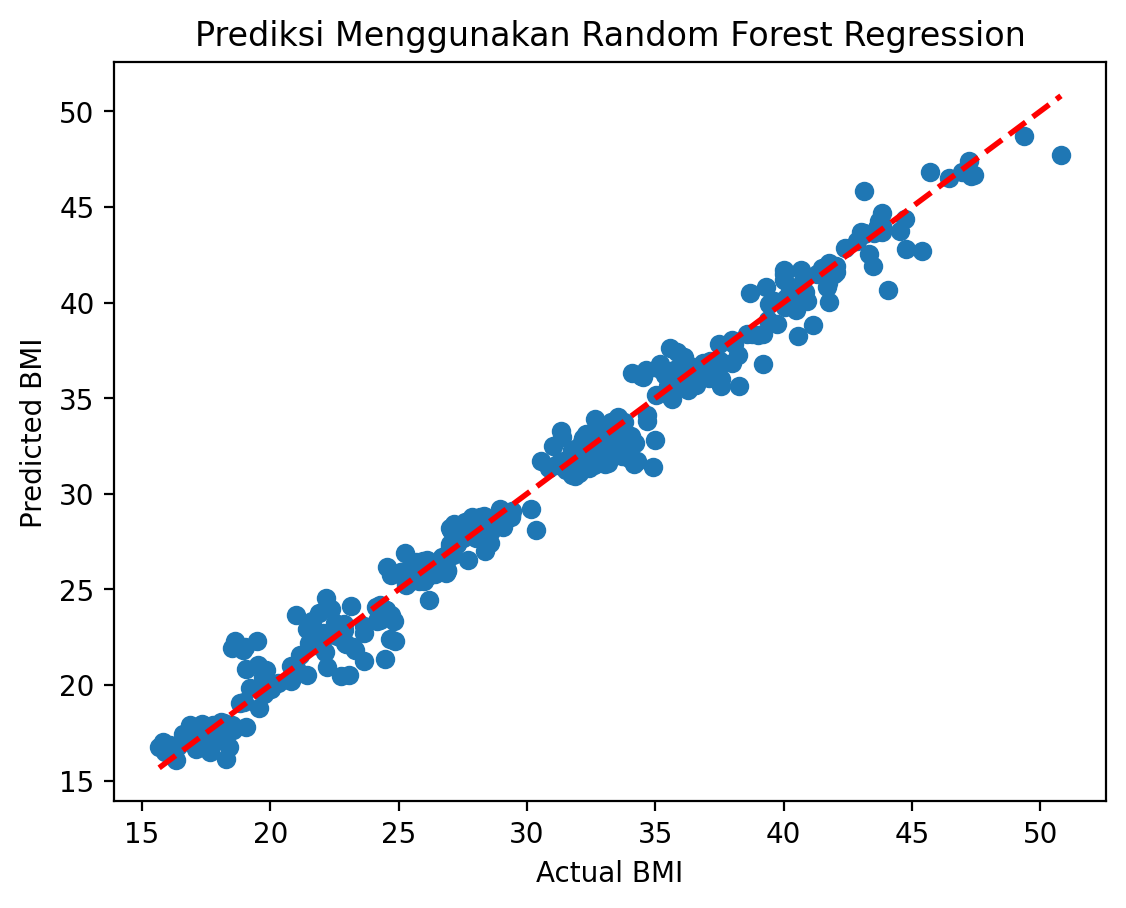

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi hasil prediksi
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual BMI')
plt.ylabel('Predicted BMI')
plt.title('Prediksi Menggunakan Random Forest Regression')
plt.show()

Linear Regression

In [ ]:
# Menghitung MSE
mse = mean_squared_error(y_test, y_pred_li_reg)
print("Mean Squared Error (MSE):", mse)

# Menghitung RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Menghitung R-squared
r2 = r2_score(y_test, y_pred_li_reg)
print("R-squared (R^2):", r2)

Mean Squared Error (MSE): 7.336572571541478
Root Mean Squared Error (RMSE): 2.708610819505356
R-squared (R^2): 0.8889343098806128


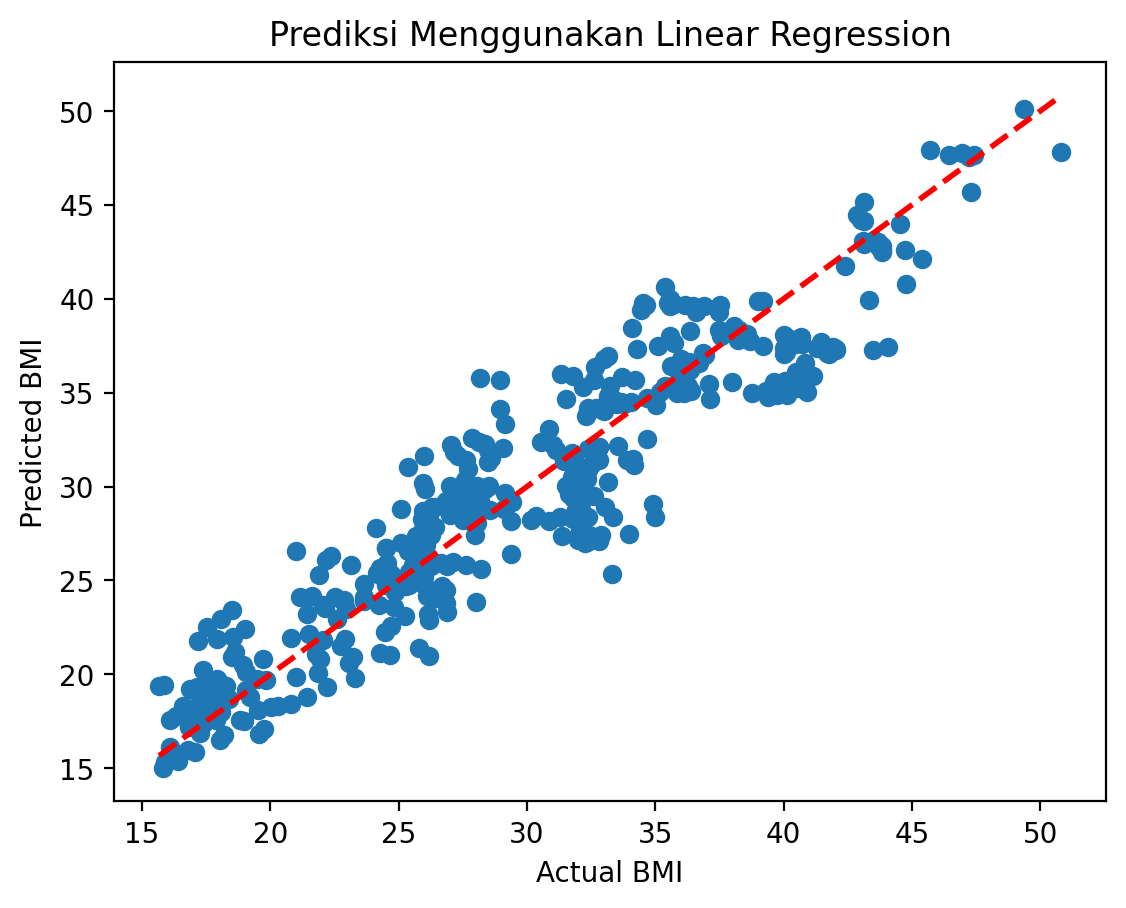

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi hasil prediksi
plt.scatter(y_test, y_pred_li_reg)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual BMI')
plt.ylabel('Predicted BMI')
plt.title('Prediksi Menggunakan Linear Regression')
plt.show()

Decision Tree

In [ ]:
# Menghitung MSE
mse = mean_squared_error(y_test, y_pred_d_tree)
print("Mean Squared Error (MSE):", mse)

# Menghitung RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Menghitung R-squared
r2 = r2_score(y_test, y_pred_d_tree)
print("R-squared (R^2):", r2)

Mean Squared Error (MSE): 1.7874896816892651
Root Mean Squared Error (RMSE): 1.3369703368770995
R-squared (R^2): 0.9729398471640295


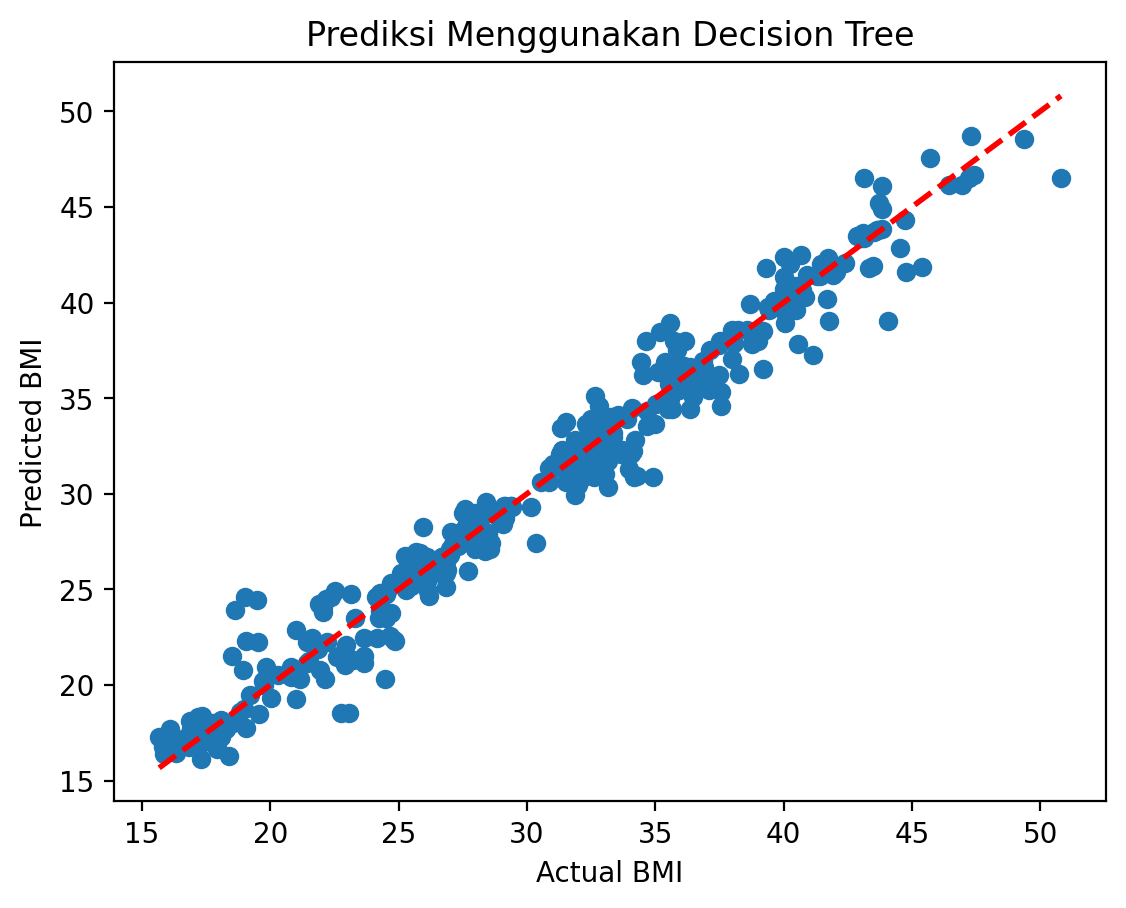

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi hasil prediksi
plt.scatter(y_test, y_pred_d_tree)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual BMI')
plt.ylabel('Predicted BMI')
plt.title('Prediksi Menggunakan Decision Tree')
plt.show()

K-Nearest Neighbors (KNN)

In [ ]:
# Menghitung MSE
mse = mean_squared_error(y_test, y_pred_knn)
print("Mean Squared Error (MSE):", mse)

# Menghitung RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Menghitung R-squareda
r2 = r2_score(y_test, y_pred_knn)
print("R-squared (R^2):", r2)

Mean Squared Error (MSE): 4.01007483857625
Root Mean Squared Error (RMSE): 2.002517125663661
R-squared (R^2): 0.939292942987507


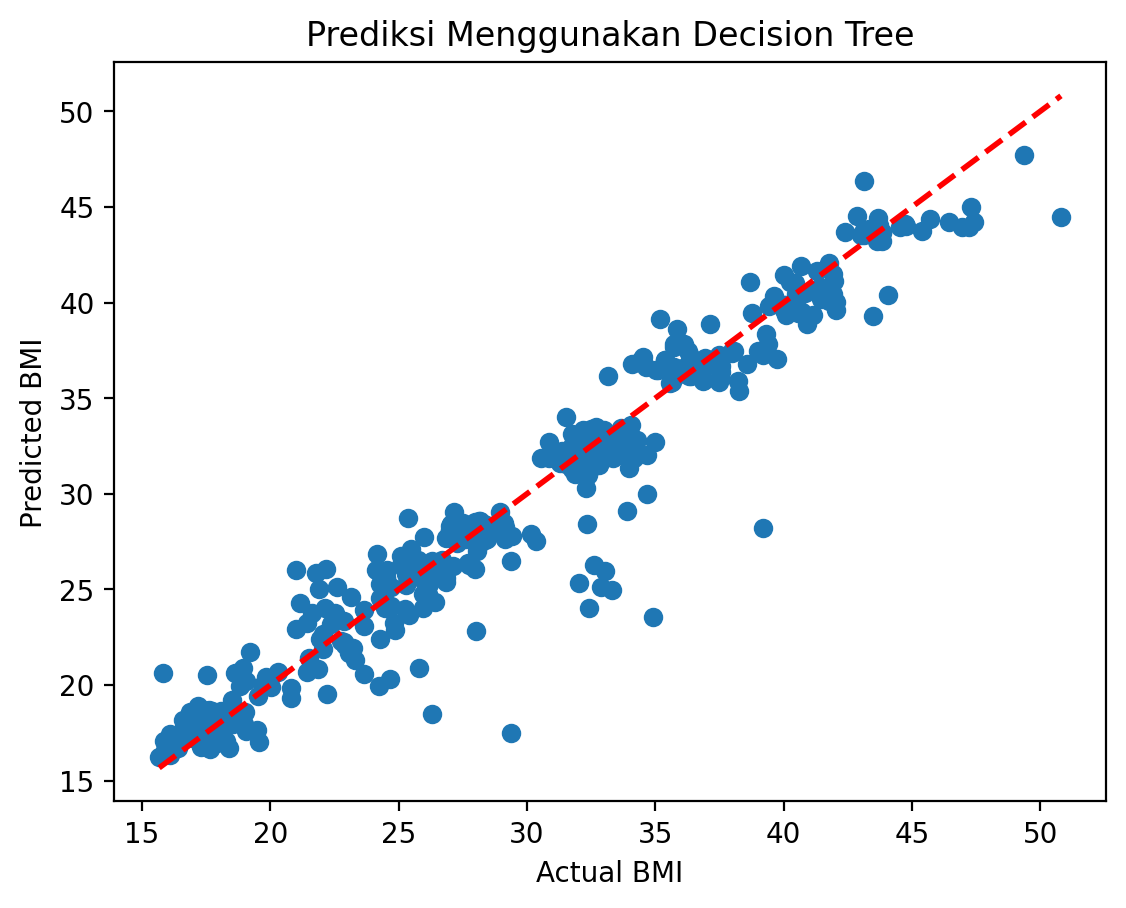

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi hasil prediksi
plt.scatter(y_test, y_pred_knn)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual BMI')
plt.ylabel('Predicted BMI')
plt.title('Prediksi Menggunakan Decision Tree')
plt.show()

##Perbandingan Performa Selutruh Algoritma

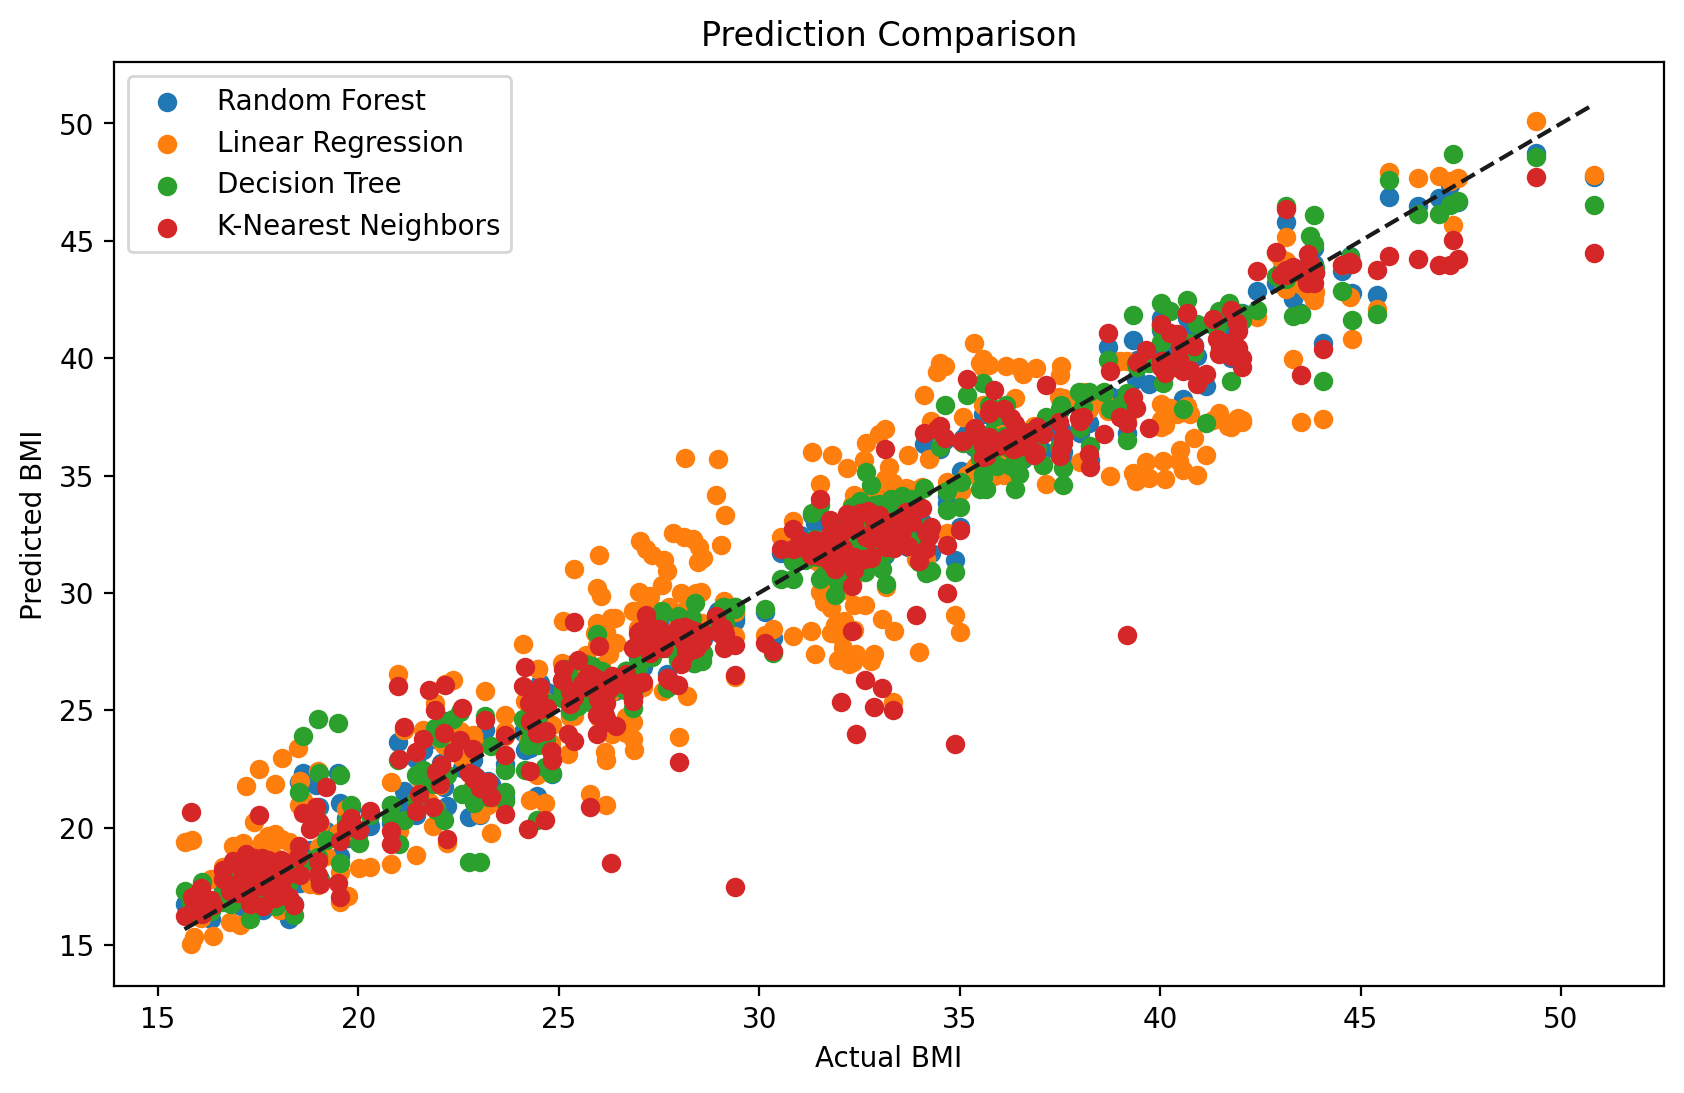

In [ ]:
models = [
    ("Random Forest", y_pred),
    ("Linear Regression", y_pred_li_reg),
    ("Decision Tree", y_pred_d_tree),
    ("K-Nearest Neighbors", y_pred_knn),
]

plt.figure(figsize=(10, 6))
for name, y_pred in models:
    plt.scatter(y_test, y_pred, label=name)
    plt.xlabel('Actual BMI')
    plt.ylabel('Predicted BMI')
    plt.title('Prediction Comparison')
    plt.legend()

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

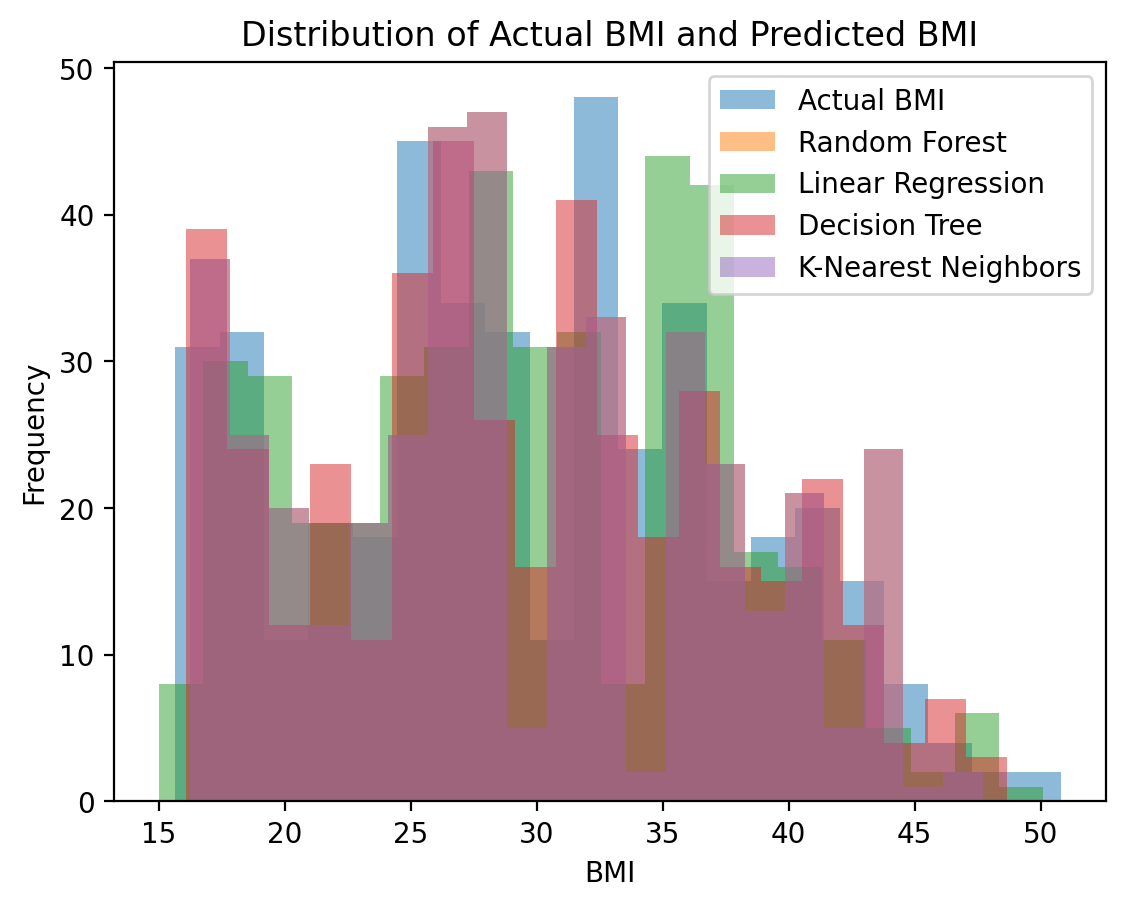

In [ ]:
# Visualisasi distribusi BMI sebenarnya (y_test)
plt.hist(y_test, bins=20, alpha=0.5, label='Actual BMI')

# Visualisasi distribusi BMI yang diprediksi menggunakan RFR
plt.hist(y_pred, bins=20, alpha=0.5, label='Random Forest')

# Visualisasi distribusi BMI yang diprediksi menggunakan Linear Regression
plt.hist(y_pred_li_reg, bins=20, alpha=0.5, label='Linear Regression')

# Visualisasi distribusi BMI yang diprediksi menggunakan Decision Tree
plt.hist(y_pred_d_tree, bins=20, alpha=0.5, label='Decision Tree')

# Visualisasi distribusi BMI yang diprediksi menggunakan KNN
plt.hist(y_pred_knn, bins=20, alpha=0.5, label='K-Nearest Neighbors')


plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of Actual BMI and Predicted BMI')
plt.legend()
plt.show()